## **Bài toán đặt ra**

> Hiện nay xe đạp cho thuê đã được triển khai ở nhiều thành phố đô thị để nâng cao sự thoải mái khi di chuyển. Điều quan trọng là việc cung cấp xe đạp cho thuê phải tiếp cận được với công chúng vào đúng thời điểm vì nó sẽ giảm bớt thời gian chờ đợi. Do đó, việc đáp ứng cho các địa điểm thuê xe trong thành phố có một nguồn cung cấp xe đạp cho thuê ổn định trở thành một mối quan tâm lớn. Dựa vào dữ liệu thời tiết và thông tin về thời gian, hãy dự đoán số lượng xe đạp cần thiết mỗi giờ để có nguồn cung cấp xe đạp cho thuê ổn định. 

## **Phần 1: Tiền xử lý dữ liệu, Phân tích thăm dò (EDA) và Feature engineering**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import joblib
import json
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Hàm vét cạn
def sub_lists (l): 
    base = []   
    lists = [base] 
    for i in range(len(l)): 
        orig = lists[:] 
        new = l[i] 
        for j in range(len(lists)): 
            lists[j] = lists[j] + [new] 
        lists = orig + lists 
          
    return lists

- Load dataset

In [ ]:
!git clone https://github.com/anhkhoatrannguyen259/dataset.git
!ls dataset

Cloning into 'dataset'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 54 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (54/54), done.
 50_Startups.csv	  monet.jpg
 Ames_Housing_Sales.csv  'Real_estate_Taiwan.xlsx - data.csv'
 c2_a1_nit_utils.py	  ronaldo.jpg
 car.csv		  SeoulBikeData.csv
 data.mat		  stone_style.jpg
 helper.py		  test_catvnoncat.h5
 louvre.jpg		  test_signs.h5
 louvre_small.jpg	  thumbs_up.jpg
 mnist_test.csv.zip	  train_catvnoncat.h5
 mnist_train.csv.zip	  train_signs.h5
 monet_800600.jpg	  X_Y_Sinusoid_Data.csv


In [ ]:
df = pd.read_csv("/content/dataset/SeoulBikeData.csv", encoding= 'unicode_escape')
df.rename(columns={'Date':'date', 'Rented Bike Count':'rented bike count', 'Hour':'hour', 'Temperature(°C)':'temperature', 'Humidity(%)':'humidity', 'Wind speed (m/s)':'wind speed', 'Visibility (10m)':'visibility', 'Dew point temperature(°C)':'dew point temperature', 'Solar Radiation (MJ/m2)':'solar radiation', 'Rainfall(mm)':'rainfall', 'Snowfall (cm)':'snowfall', 'Seasons':'seasons', 'Holiday':'holiday', 'Functioning Day':'functioning day'}, inplace=True)
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### **1.1. Tiền xử lý dữ liệu**

- Kiểm tra kiểu dữ liệu

In [ ]:
df.dtypes

date                      object
rented bike count          int64
hour                       int64
temperature              float64
humidity                   int64
wind speed               float64
visibility                 int64
dew point temperature    float64
solar radiation          float64
rainfall                 float64
snowfall                 float64
seasons                   object
holiday                   object
functioning day           object
dtype: object

- Kiểm tra dữ liệu thiếu

In [ ]:
df.isnull().sum()

date                     0
rented bike count        0
hour                     0
temperature              0
humidity                 0
wind speed               0
visibility               0
dew point temperature    0
solar radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning day          0
dtype: int64

#### **1.1.1. Xử lý dữ liệu ngày tháng**

- Chuẩn hóa lại định dạng ngày tháng từ **DD/MM /YYYY** sang **YYYY-MM-DD**

In [ ]:
for i in range(df.shape[0]):
  df['date'][i] = datetime.datetime.strptime(df['date'][i], "%d/%m/%Y").strftime("%Y-%m-%d")

In [ ]:
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#### **1.1.2. Tạo ra các đặc trưng từ dữ liệu ngày tháng**

In [ ]:
# day of the week
df['day of the week'] = [t.strftime('%A') for t in pd.DatetimeIndex(df.date)]

# month
df['month'] = [t.month for t in pd.DatetimeIndex(df.date)]

# week status
week_status = []
for t in pd.DatetimeIndex(df.date):
  if t.dayofweek < 5:
    week_status.append('Weekday')
  else:
    week_status.append('Weekend')
df['week status'] = week_status

# Dataset sau khi được tạo thêm thuộc tính
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day,day of the week,month,week status
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday


> **Nhận xét:** từ biến **"date"** ta đã xử lý thành các biến **"month"**, **"day of the week", "week status"** (categorical feature) để phục vụ cho việc phân tích ở phần sau.

### **1.2. Exploratory data analysis (EDA) và Feature engineering**

#### **1.2.1. Biến số**

- Tóm tắt các thông số thống kê của các numerical features trong dataset

In [ ]:
df[['rented bike count', 'temperature', 'humidity','wind speed', 'visibility', 'dew point temperature', 'solar radiation', 'rainfall', 'snowfall']].describe()

,rented bike count,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- Histogram

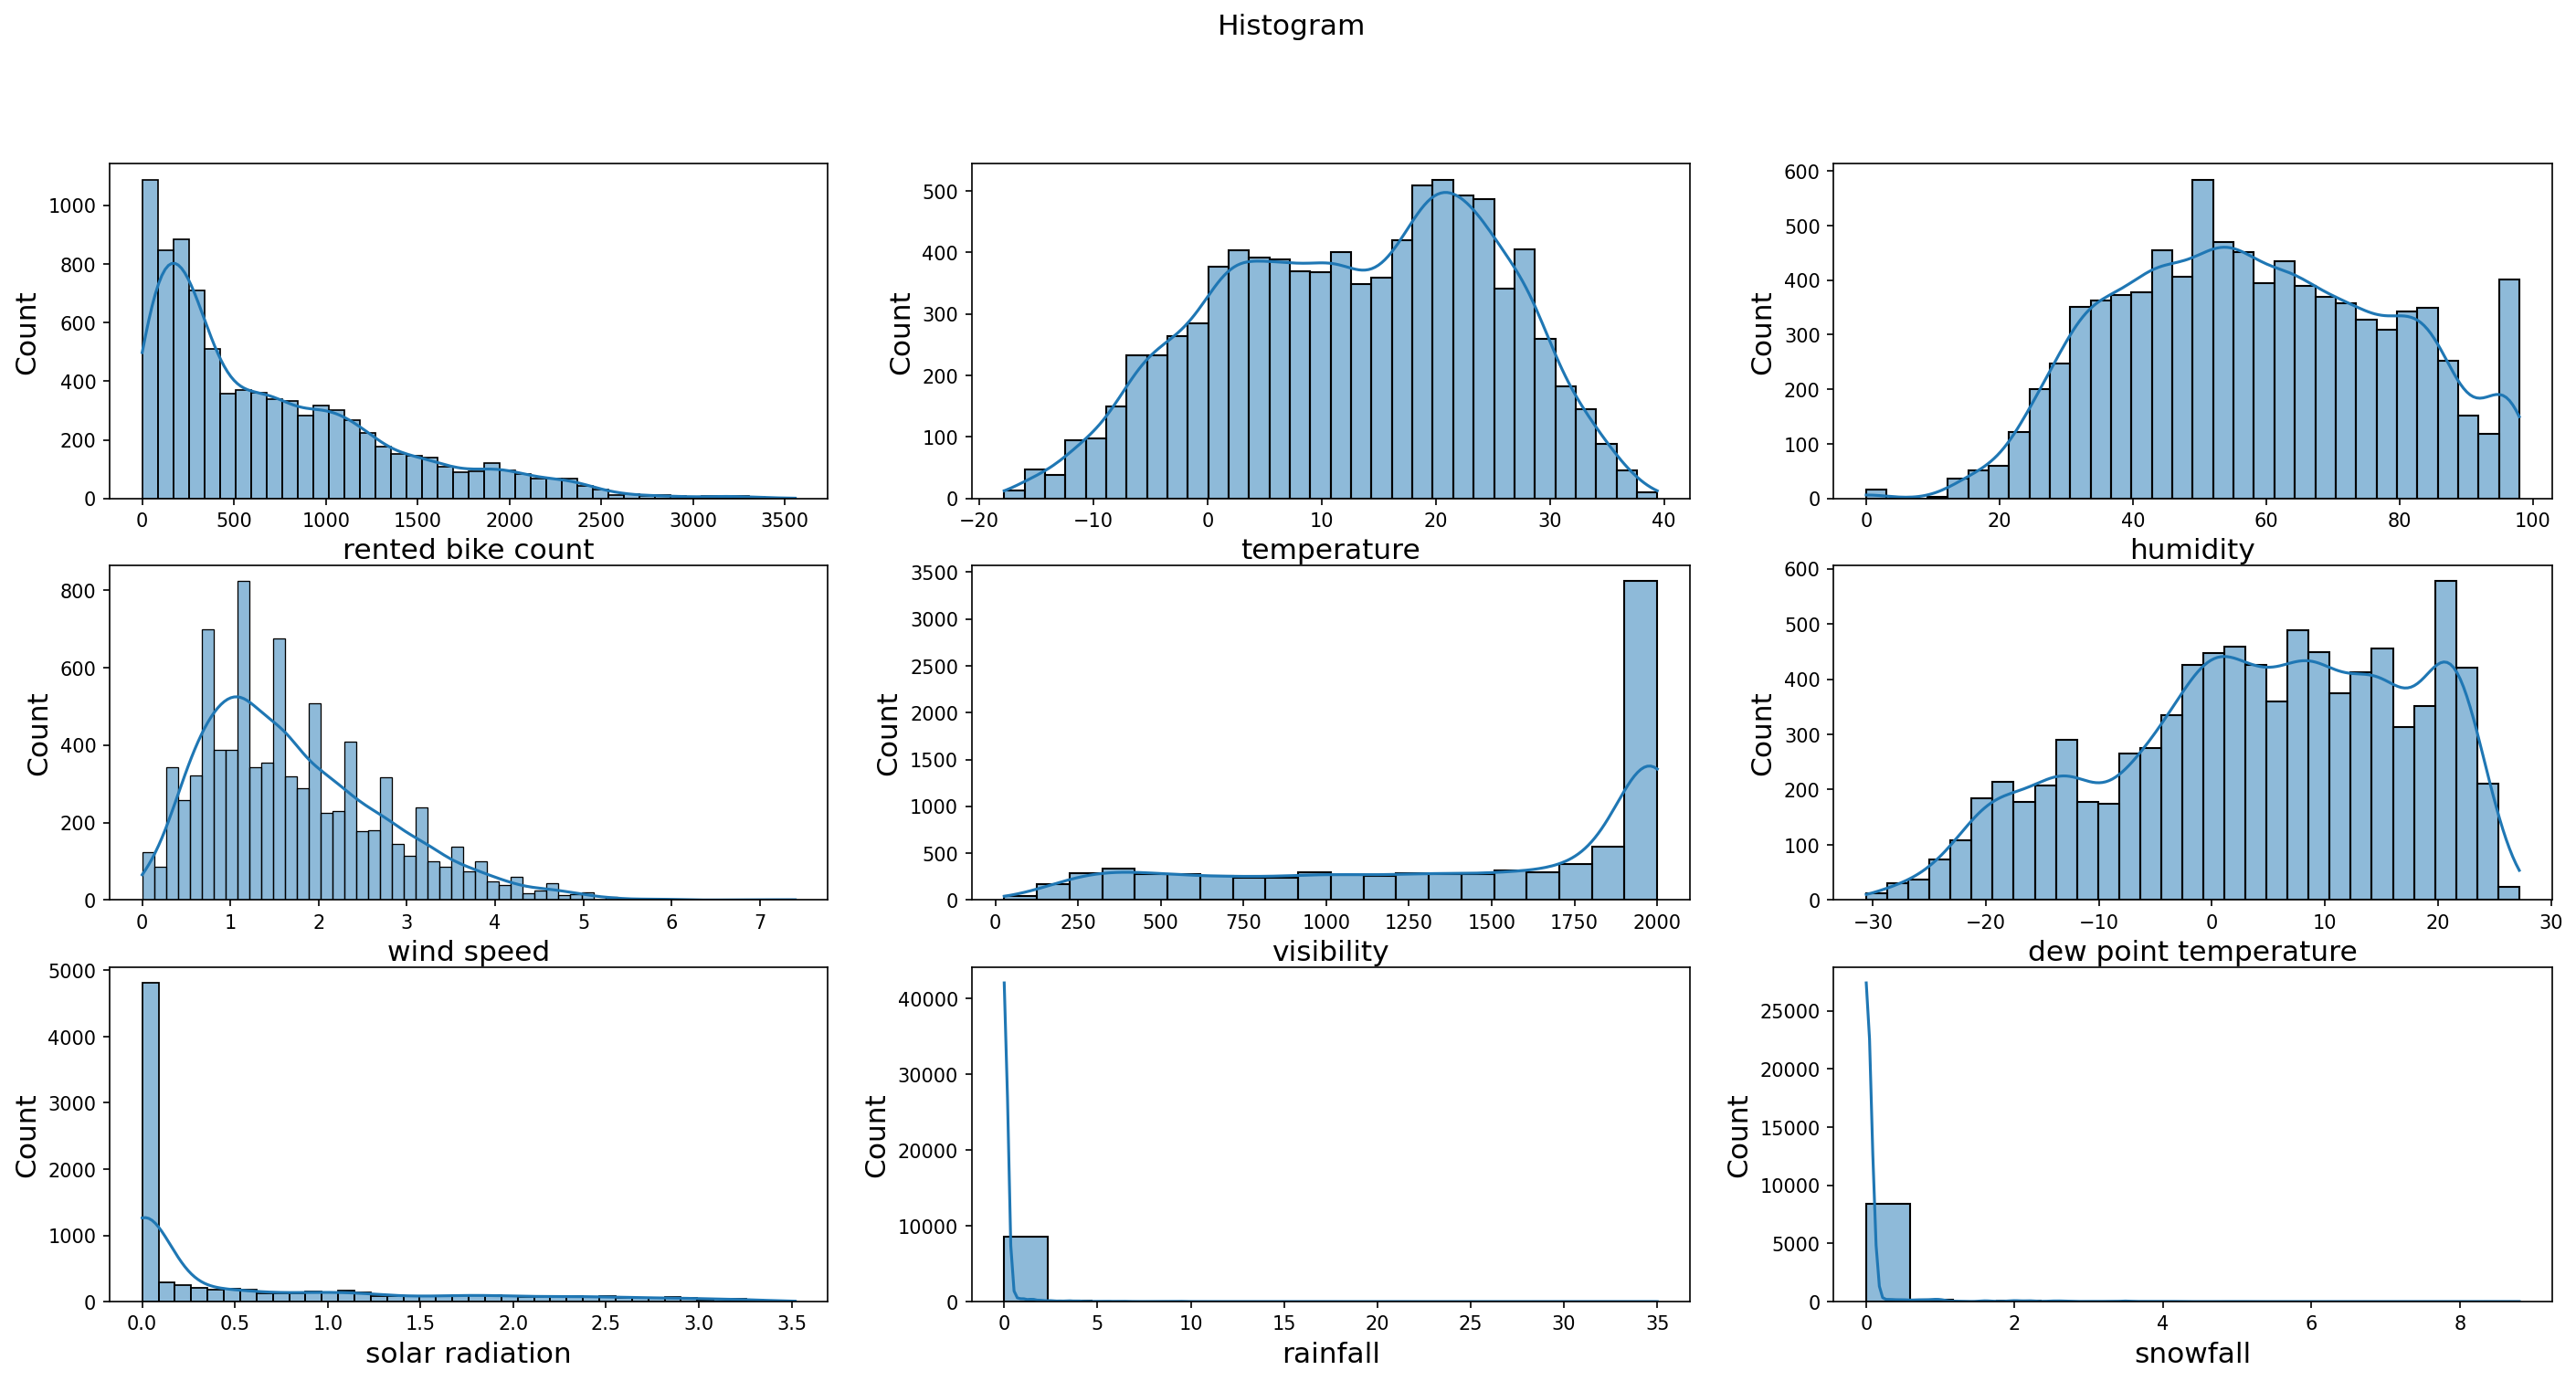

In [ ]:
list_hist = ['rented bike count', 'temperature', 'humidity','wind speed', 'visibility', 'dew point temperature', 'solar radiation', 'rainfall', 'snowfall']
j=1
plt.figure(figsize=(23,11), dpi=150)
plt.suptitle("Histogram", fontsize=15)
for i in list_hist:
  plt.subplot(3,3,j)
  j+=1
  sns.histplot(data=df, x=i, kde=True)
  plt.xlabel(str(i), fontsize=15)
  plt.xticks(fontsize=10)
  plt.ylabel("Count", fontsize=15)
  plt.yticks(fontsize=10)
plt.show()


>> **Nhận xét:** 
>>
>> Quan sát hình, ta thấy 3 biến **"temperature", "humidity", "dew point temperature"** có dữ liệu phân phối khá cân đối, các biến **"windspeed", "solar radiation", "rainfall", "snowfall"** dữ liệu phân phối lệch về bên phải (right skewed), biến **"visibility"** có dữ liệu phân phối lệch về bên trái (left skewed).

- Phát họa **Regression plot** để quan sát sự ảnh hưởng của các thuộc tính lên biến phụ thuộc **"rented bike count"**

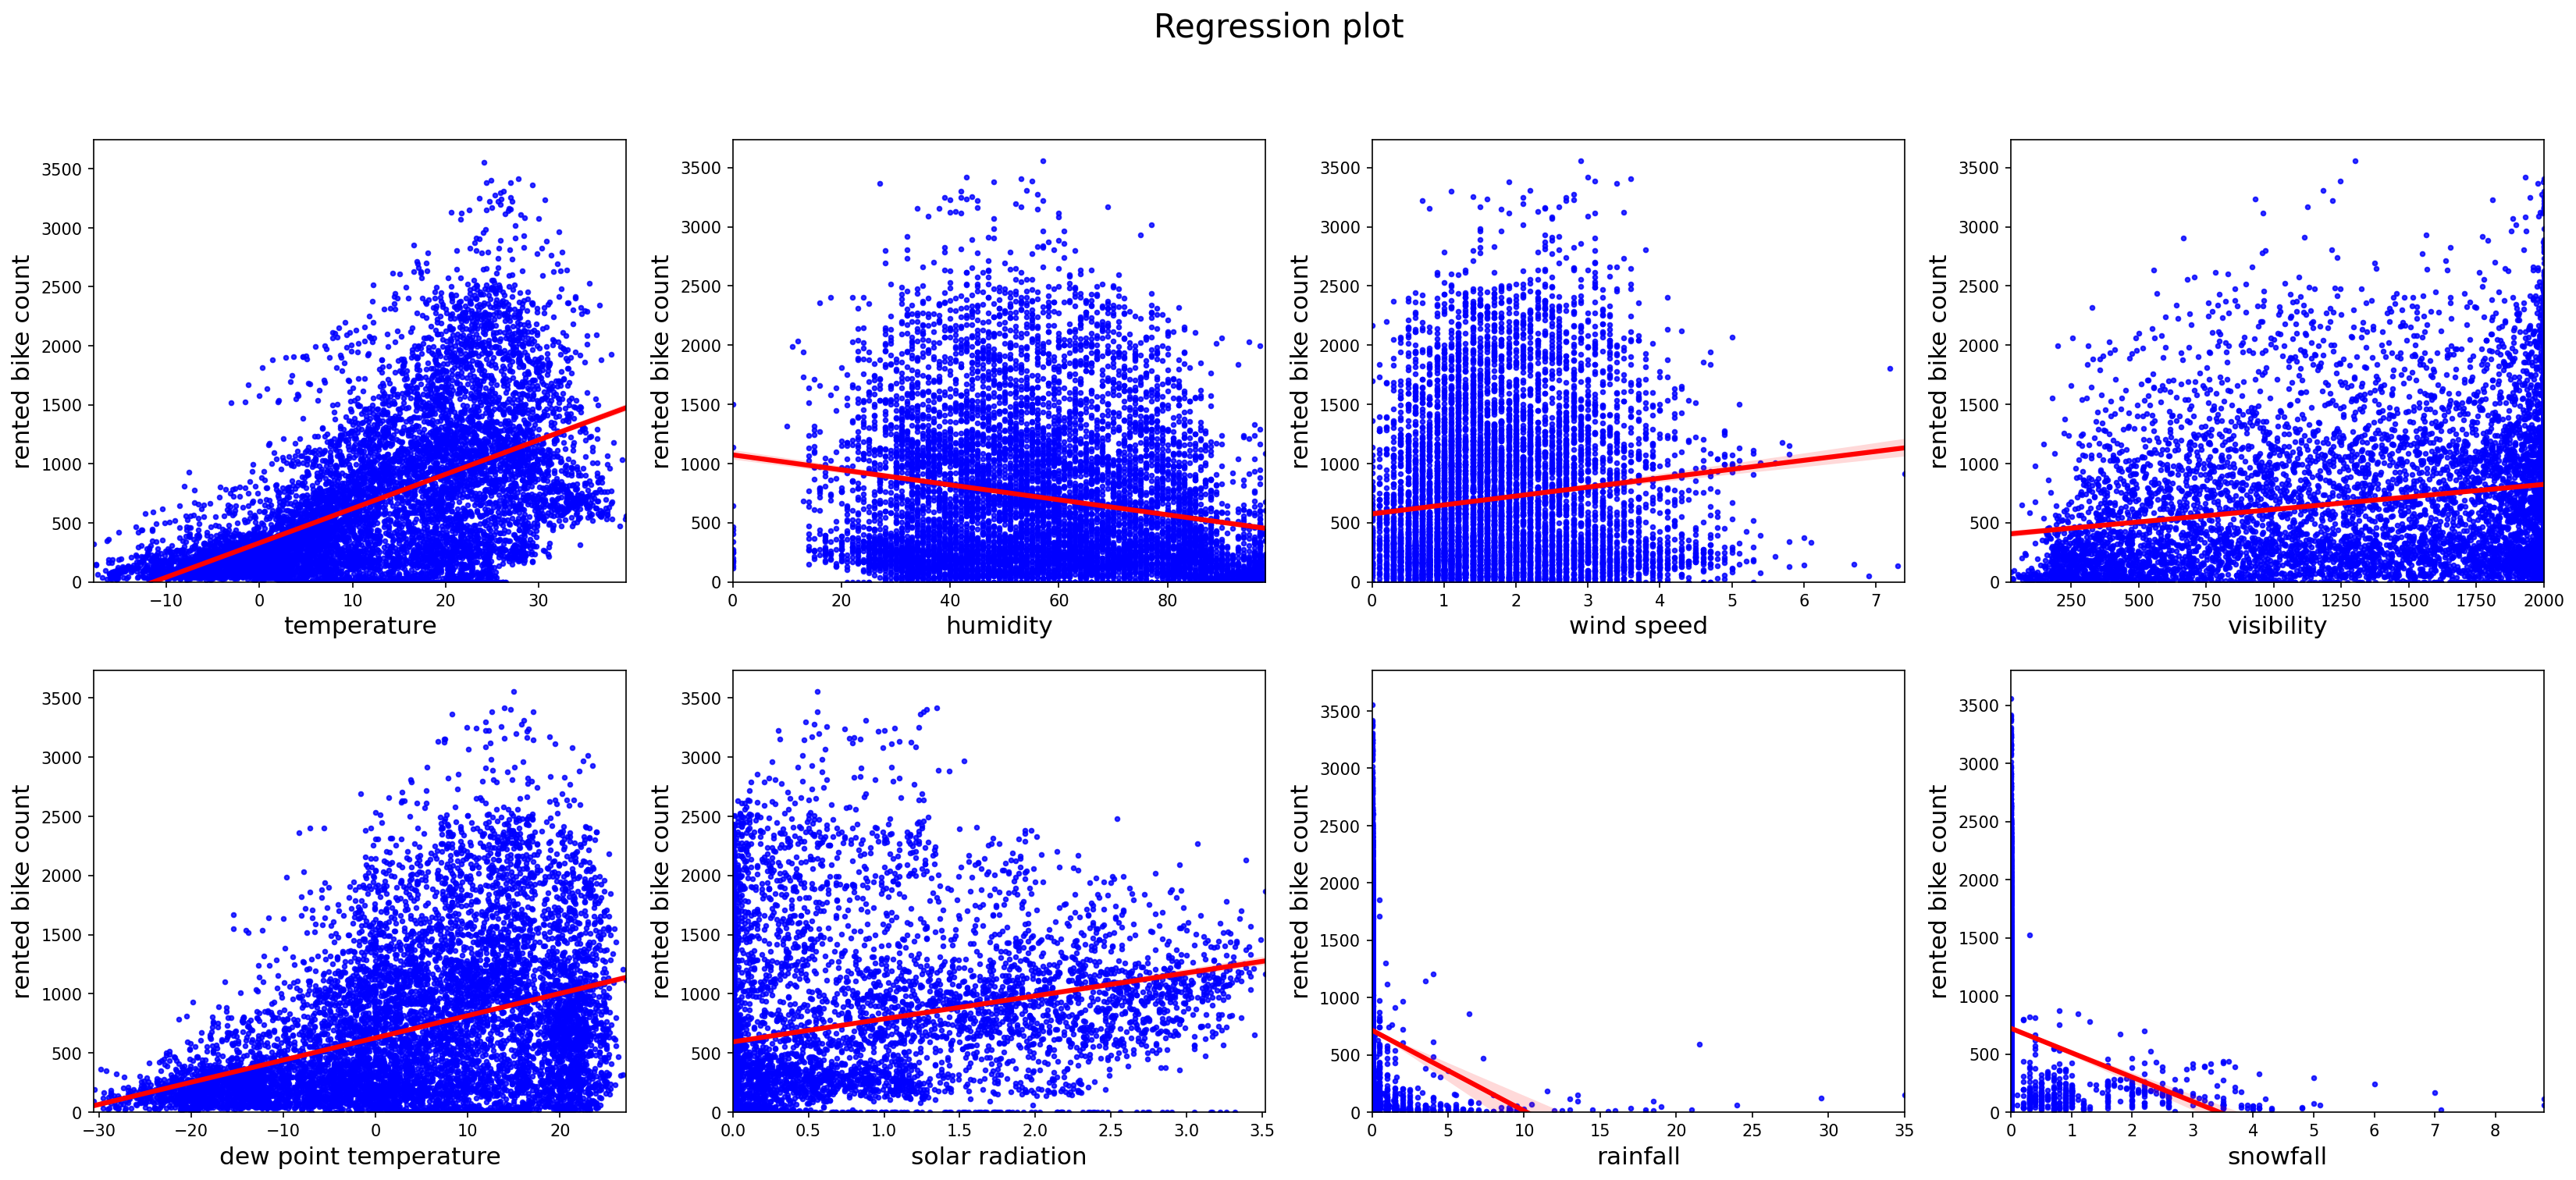

In [ ]:
list_corr = ['temperature', 'humidity', 'wind speed', 'visibility', 'dew point temperature', 'solar radiation', 'rainfall', 'snowfall']
j=1  
plt.figure(figsize=(27,11), dpi=150) 
plt.suptitle("Regression plot", fontsize=20)
for i in list_corr:
    plt.subplot(2,4,j)
    j+=1
    #plt.title('Regression plot of "{}" vs "rented bike count"'.format(str(i)))
    sns.regplot(x = i, y = 'rented bike count', data=df, scatter_kws={"s": 7, "color":"blue"}, line_kws={"lw":3, "color":"red"})
    plt.xlabel(str(i), fontsize=15)
    plt.ylabel('rented bike count', fontsize=15)
    plt.ylim(0,)

plt.show()

>> **Nhận xét:** 
>>
>> Quan sát các hình, ta thấy đường hồi quy của các biến **"temperature", "dew point temperature", "solar radiation"** thể hiện mối quan hệ tuyến tính đồng thuận với biến **"rented bike count"**; đồng thời các điểm dữ liệu phân bố tập trung gần các đường hồi quy cho thấy sự tương quan của các biến này với biến mục tiêu **"rented bike count"**. Với các biến **"wind speed", "visibility"**, đường hồi quy thể hiện mối quan hệ tuyến tính đồng thuận với biến mục tiêu nhưng các điểm dữ liệu phân bố không tập trung gần các đường hồi quy cho thấy sự tương quan thấp. Các biến **"humidity","rainfall", "snowfall"** có đường hồi quy thể hiện mối quan hệ tuyến tính không đồng thuận với biến **"rented bike count"**, các điểm dữ liệu phân bố không tập trung gần các đường hồi quy cho thấy sự tương quan thấp với biến mục tiêu; đặc biệt ở 2 biến **"rainfall", "snowfall"** có sự xuất hiện của rất nhiều giá trị 0 đã ảnh hưởng tới việc dự đoán của mô hình.

- **Residual plot** 

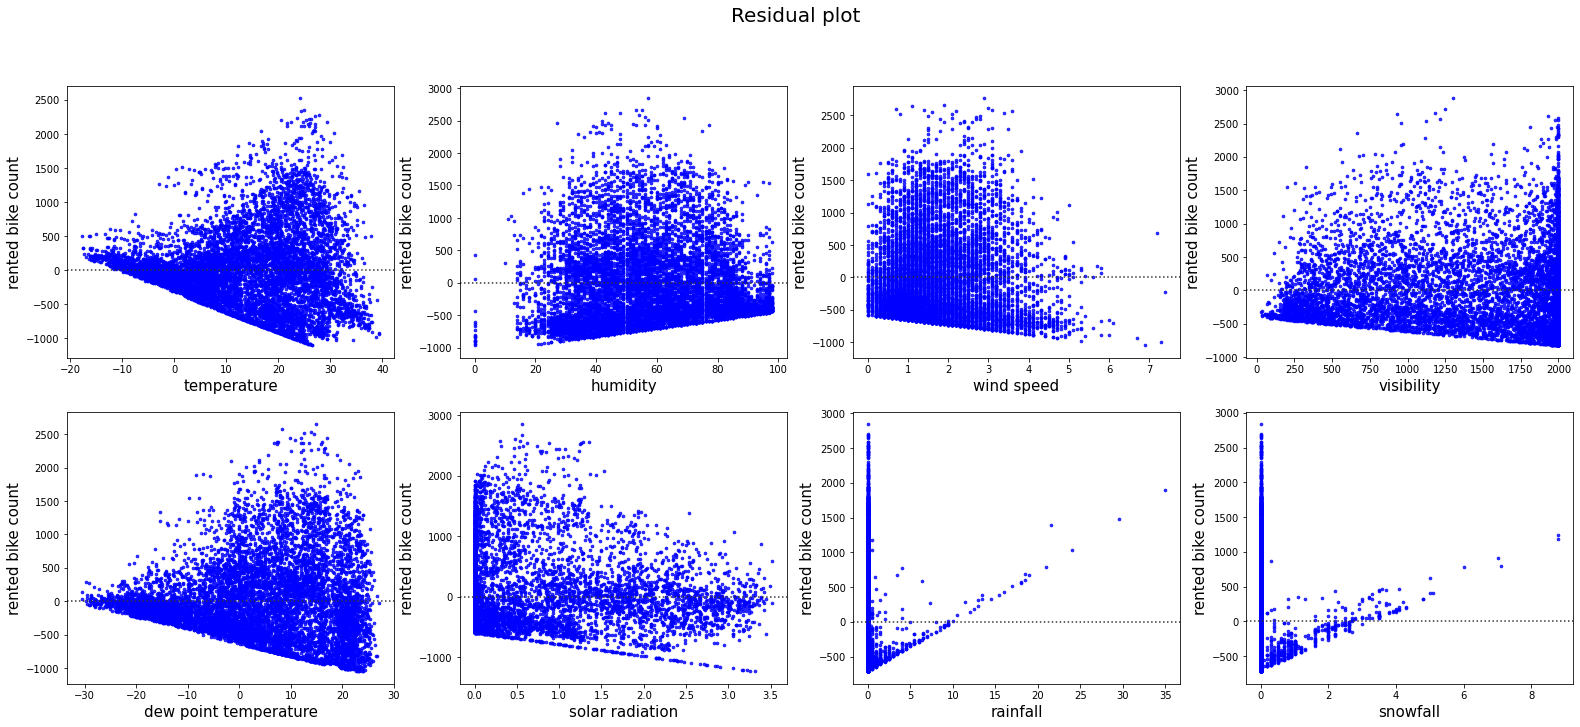

In [ ]:
j=1
#plt.figure(figsize=(20,33))  
plt.figure(figsize=(27,11)) 
plt.suptitle("Residual plot", fontsize=20)
for i in list_corr:
    plt.subplot(2,4,j)
    j+=1
    #plt.title('Residual plot of "{}" vs "rented bike count"'.format(str(i)))
    sns.residplot(x = i, y = 'rented bike count', data=df, scatter_kws={"s": 7, "color":"blue"}, line_kws={"lw": 100})
    plt.xlabel(str(i), fontsize=15)
    plt.ylabel('rented bike count', fontsize=15)

plt.show()

>> **Nhận xét:**
>>
>> Quan sát hình, ta thấy các thuộc tính có điểm dữ liệu không ngẫu nhiên trải đều quanh trục x nên các thuộc tính này **không phù hợp** để phát triển mô hình **hồi quy tuyến tính**.

> **Hệ số tương quan tuyến tính (Correlation coefficient)** dùng để đánh giá mức độ tương quan tuyến tính giữa 2 biến X và Y. 
Ý nghĩa của hệ số tương quan tuyến tính 
- Càng gần 1: tương quan thuận giữa 2 biến càng lớn.
- Gần 0: hai biến không có quan hệ.
- Càng gần -1: tương quan nghịch giữa 2 biến càng lớn.

- Dùng **Correlation matrix** biểu diễn sự tương quan của các biến độc lập với biến phụ thuộc "Rented Bike Count" 



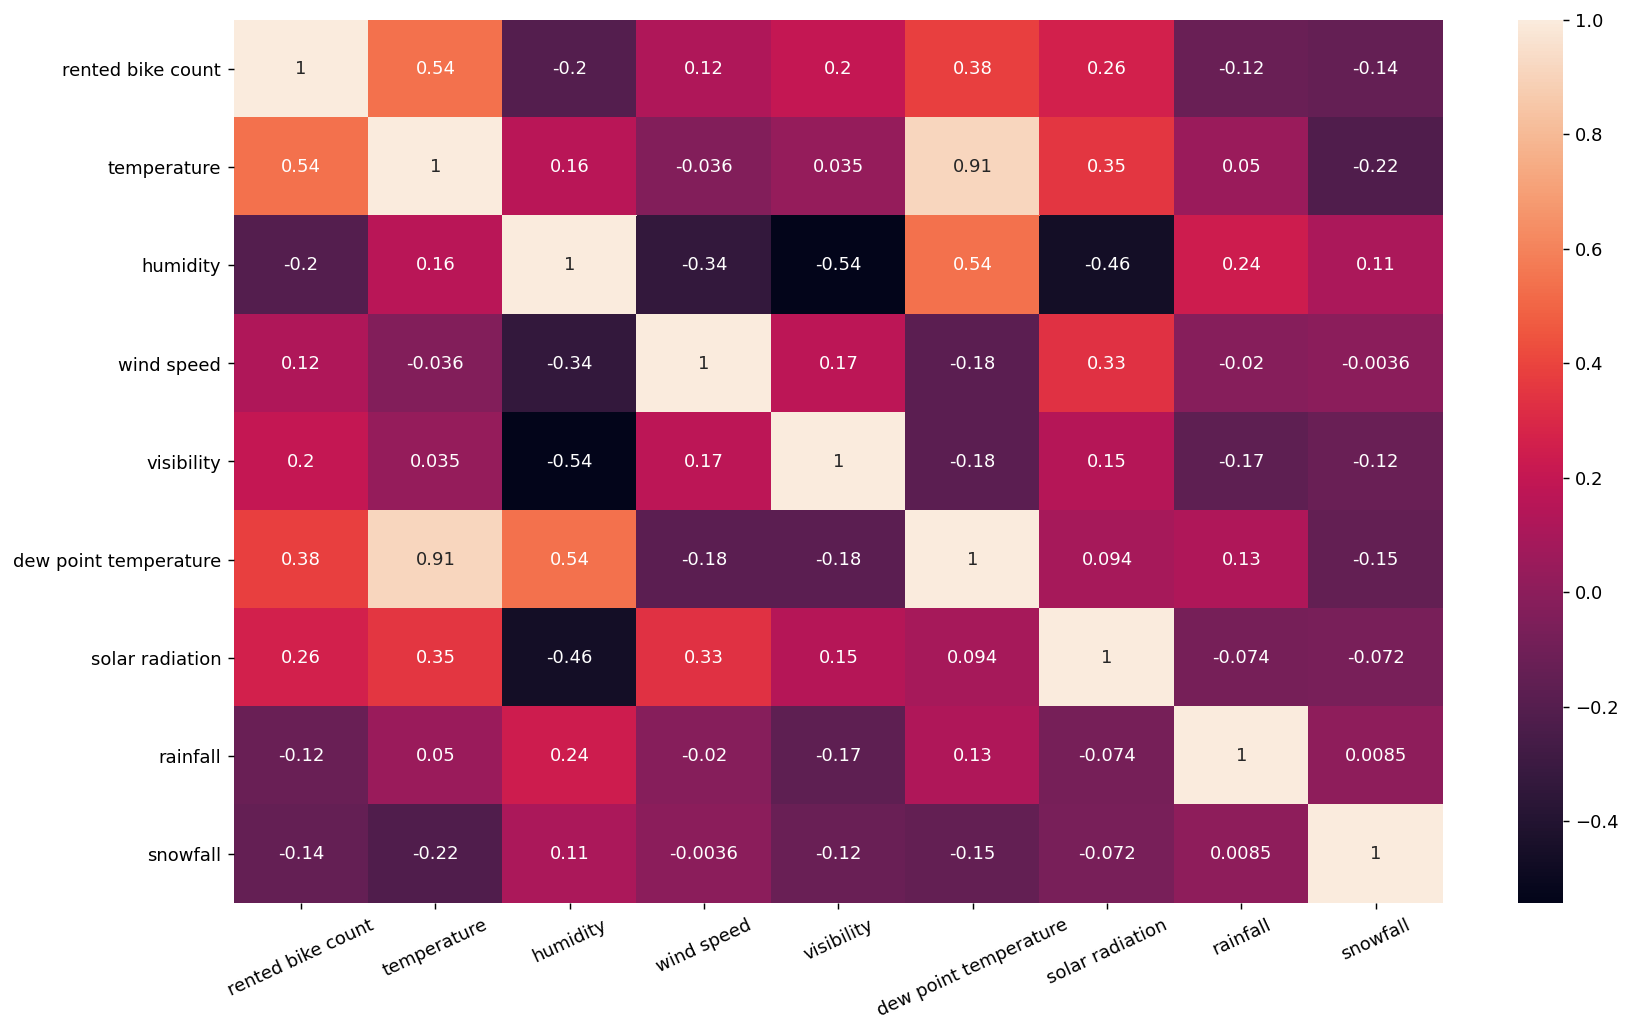

In [ ]:
df_corr = df[['rented bike count', 'temperature', 'humidity','wind speed', 'visibility', 'dew point temperature', 'solar radiation', 'rainfall', 'snowfall']].corr()
plt.figure(figsize=(15,9), dpi=130)
sns.heatmap(df_corr, annot = True)
plt.xticks(rotation=25)
plt.show()

>> **Nhận xét:** quan sát correlation matrix ta thấy các biến có tương quan rất yếu với **"rented bike count"** là các biến **"humidity", "wind speed", "visibility", "solar radiation", "rainfall", "snowfall"**; biến có tương quan yếu với **"rented bike count"** là **"dew point temperature"**; biến có tương quan vừa phải với **"rented bike count"** là **"temperature"**.

> **P-value** thể hiện mức độ chắc chắn về mối tương quan đã tính toán. Ý nghĩa của giá trị p_value:
- **p_value < 0.001**: kết quả có độ tin cậy cao.
- **p_value < 0.05**: kết quả có độ tin cậy vừa phải. 
- **p_value < 0.1**: kết quả có độ tin cậy thấp.
- **p_value > 0.1**: kết quả không có độ tin cậy.
>
> Ta sẽ tính p-value và dựa vào nó để đưa ra mức độ chắc chắn về mối tương quan đã tính toán

- Bảng thể hiện mức độ chắc chắn về độ tương quan đã tính toán giữa các biến

In [ ]:
list_pearson = []
list_pvalue = []
list_certainly = []

for i in list_corr:
  Pearson_coef, p_value = stats.pearsonr(df[i],df['rented bike count'])
  list_pearson.append(round(Pearson_coef,2))
  list_pvalue.append(p_value)
  if p_value < 0.001:
    list_certainly.append("Strong")
  elif p_value < 0.05:
    list_certainly.append("Moderate")
  elif p_value < 0.1:
    list_certainly.append("Weak")
  elif p_value > 0.1:
    list_certainly.append("No")

df_pvalue = pd.DataFrame({'Feature':list_corr, 'Pearson Coef':list_pearson, 'P value':list_pvalue, 'Certainly':list_certainly})
df_pvalue

,Feature,Pearson Coef,P value,Certainly
0,temperature,0.54,0.000000e+00,Strong
1,humidity,-0.20,1.475065e-79,Strong
2,wind speed,0.12,5.544562e-30,Strong
3,visibility,0.20,3.672704e-79,Strong
4,dew point temperature,0.38,1.325584e-298,Strong
5,solar radiation,0.26,2.780395e-137,Strong
6,rainfall,-0.12,6.462816e-31,Strong
7,snowfall,-0.14,1.398012e-40,Strong


>> **Nhận xét:** quan sát bảng, ta thấy độ tương quan đã tính toán giữa các biến độc lập so với biến "Rented Bike Count" có độ tin cậy cao. Ta sẽ chọn các biến số có độ tương quan (Pearson Coef) với **"rented bike count"** từ [-0.2 ; -1] và [0.2 ; 1] để phát triển mô hình. Các biến được chọn là **"temperature", "humidity", "visibility", "dew point temperature", "solar radiation"**. 

#### **1.2.2. Biến phân loại**

- Ta có các biến phân loại là **"hour", "seasons", "holiday", "functioning day", "day of the week", "month", "week status"**. Tiếp theo ta sẽ tiến hành phân tích và lựa chọn các biến phân loại thích hợp để phát triển mô hình.

**Biến "hour"**

Số lượng các giá trị của feature "hour":
23    365
15    365
8     365
16    365
1     365
9     365
17    365
2     365
10    365
18    365
3     365
11    365
19    365
4     365
12    365
20    365
5     365
13    365
21    365
6     365
14    365
22    365
7     365
0     365
Name: hour, dtype: int64 



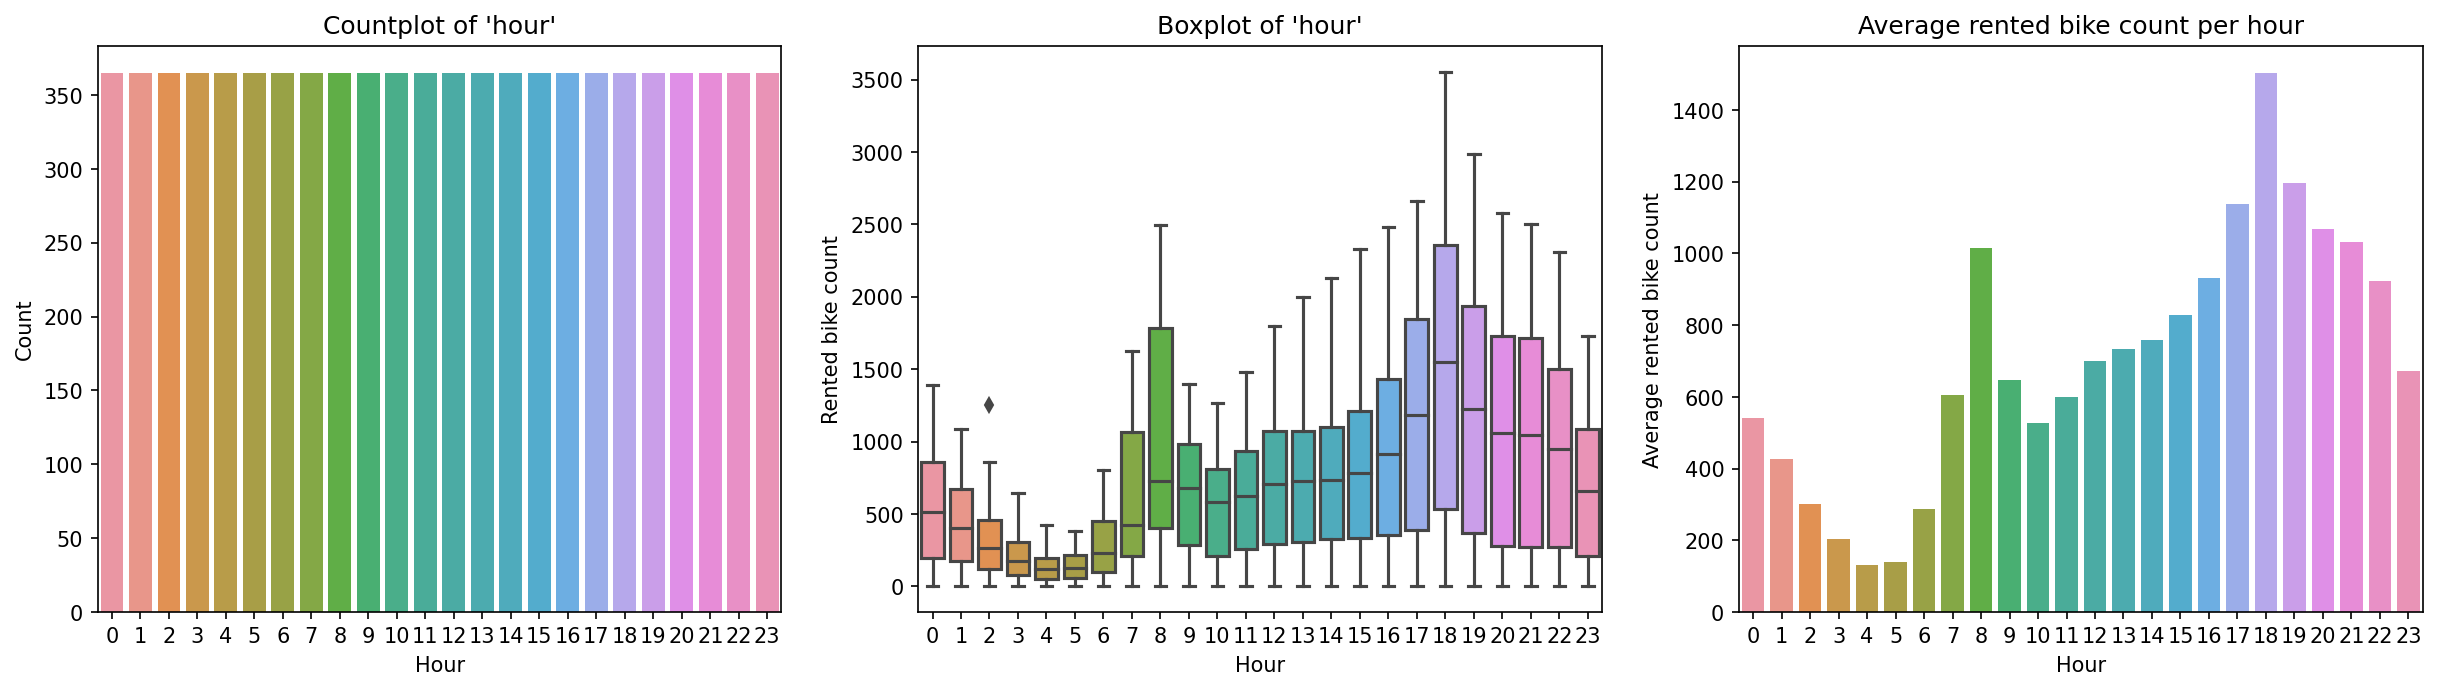

In [ ]:
print('Số lượng các giá trị của feature "hour":')
print(df['hour'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'hour'")
sns.countplot(data = df, x = 'hour')
plt.xlabel("Hour")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'hour'")
sns.boxplot(data = df, x='hour', y='rented bike count')
plt.xlabel("Hour")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count per hour")
sns.barplot(data = df, x='hour', y='rented bike count', ci=0)
plt.xlabel("Hour")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Quan sát **Countplot of 'hour'** số lượng các giá trị của feature **'hour'** đều nhau, ở **Boxplot of 'hour'** gần như không xuất hiện các giá trị ngoại lệ, ở **Average rented bike count per hour** chúng ta thấy rằng ở từng khung giờ khác nhau sẽ có lượng xe đạp trung bình được cho thuê là khác nhau. Vào buổi sáng, số lượng xe cho thuê cao vào khoảng từ 7h-9h, điều này hoàn toàn hợp lý vì đây là khoảng thời gian mọi người sẽ sử dụng xe để đi làm, đi học. Vào buổi trưa, số lượng xe được cho thuê duy trì ở một mức ổn định và có xu hướng tăng nhẹ. Vào chiều tối, số lượng xe cho thuê cao điểm từ 17h-19h vì đây là thời gian tan học, tan làm ở các công sở; bên cạnh đó, vào thời gian này thì nhu cầu đi lại bên ngoài của con người cũng cao nhất trong ngày như việc đi chơi, đi mua sắm,...Số lượng xe đạp cho thuê bắt đầu giảm từ 20h-23h và giảm mạnh từ 0h-5h vì đây là thời điểm mọi người đi ngủ chuẩn bị cho một ngày mới. Qua đó, chúng ta thấy được các giờ khác nhau sẽ có số lượng xe thuê khác nhau, giờ sẽ ảnh hưởng lên số lượng xe được cho thuê. Ta sẽ chọn biến **"hour"**.

**Biến "month"**

Số lượng các giá trị của feature "month":
7     744
5     744
12    744
3     744
10    744
1     744
8     744
6     720
4     720
11    720
9     720
2     672
Name: month, dtype: int64 



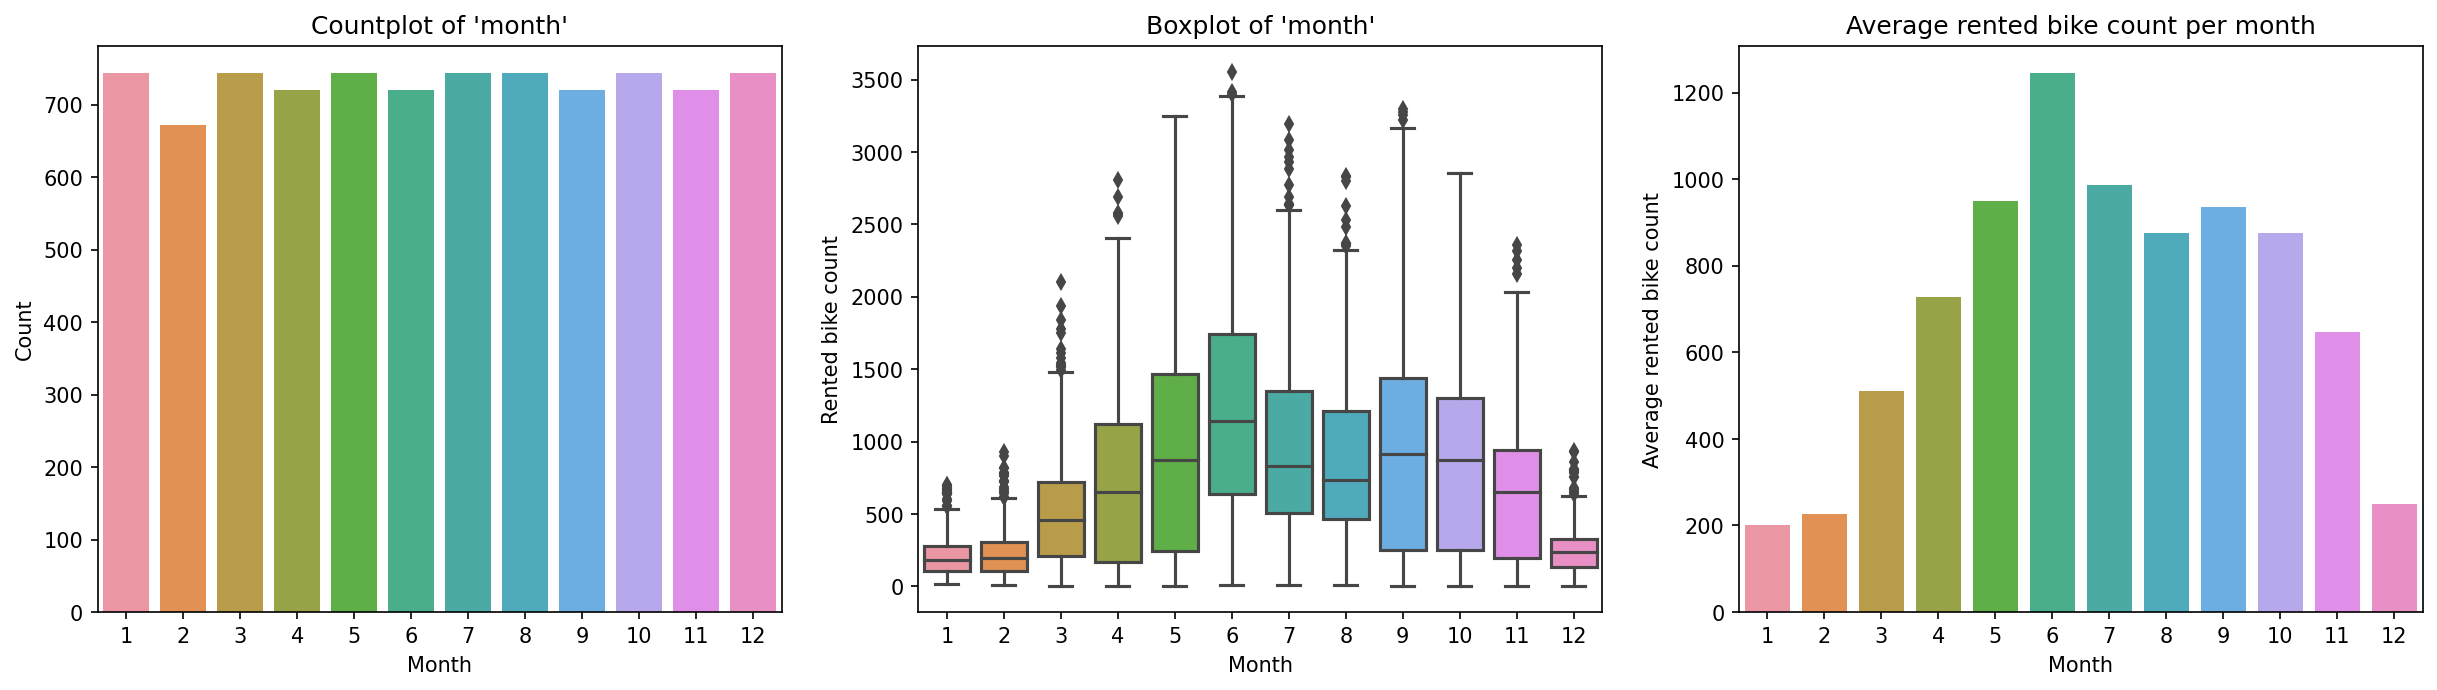

In [ ]:
print('Số lượng các giá trị của feature "month":')
print(df['month'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'month'")
sns.countplot(data = df, x = 'month')
plt.xlabel("Month")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'month'")
sns.boxplot(data = df, x='month', y='rented bike count')
plt.xlabel("Month")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count per month")
sns.barplot(data = df, x='month', y='rented bike count', ci=0)
plt.xlabel("Month")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Số lượng giá trị của biến **"month"** khi quan sát ở **Countplot of 'month'** là đầy đủ. Quan sát **Boxplot of 'month'** chúng ta thấy rằng hầu hết các tháng đều có giá trị ngoại lệ và **Average rented bike count per month** cho thấy các tháng khác nhau mang những đặc trưng thời tiết khác nhau cũng sẽ ảnh hưởng đến lượng xe đạp cho thuê, cụ thể là với tháng 12, 1, 2 (mùa đông ở Hàn Quốc) nhiệt độ hạ xuống thấp vì thế cư dân hạn chế đi ra ngoài nên số lượng xe đạp được thuê cũng giảm, các tháng còn lại thời tiết ôn hòa, ấm hơn nên có số lượng xe thuê cao hơn và nhu cầu thuê cao nhất vào giai đoạn tháng 6, 7, 8 (mùa hè ở Hàn Quốc, nhiệt độ cao hơn). Do đó, thuộc tính **"month"** có ảnh hưởng đến biến mục tiêu **"rented bike count"**, ta sẽ chọn biến **"month"**.

- Biểu diễn mối quan hệ giữa **"month"** với **"hour"**

In [ ]:
def get_by_value(value,feature):
  df1 = df[(df[feature] == value)]
  df1 = df1[['rented bike count','hour']]
  df1 = df1.groupby('hour').mean()
  return df1

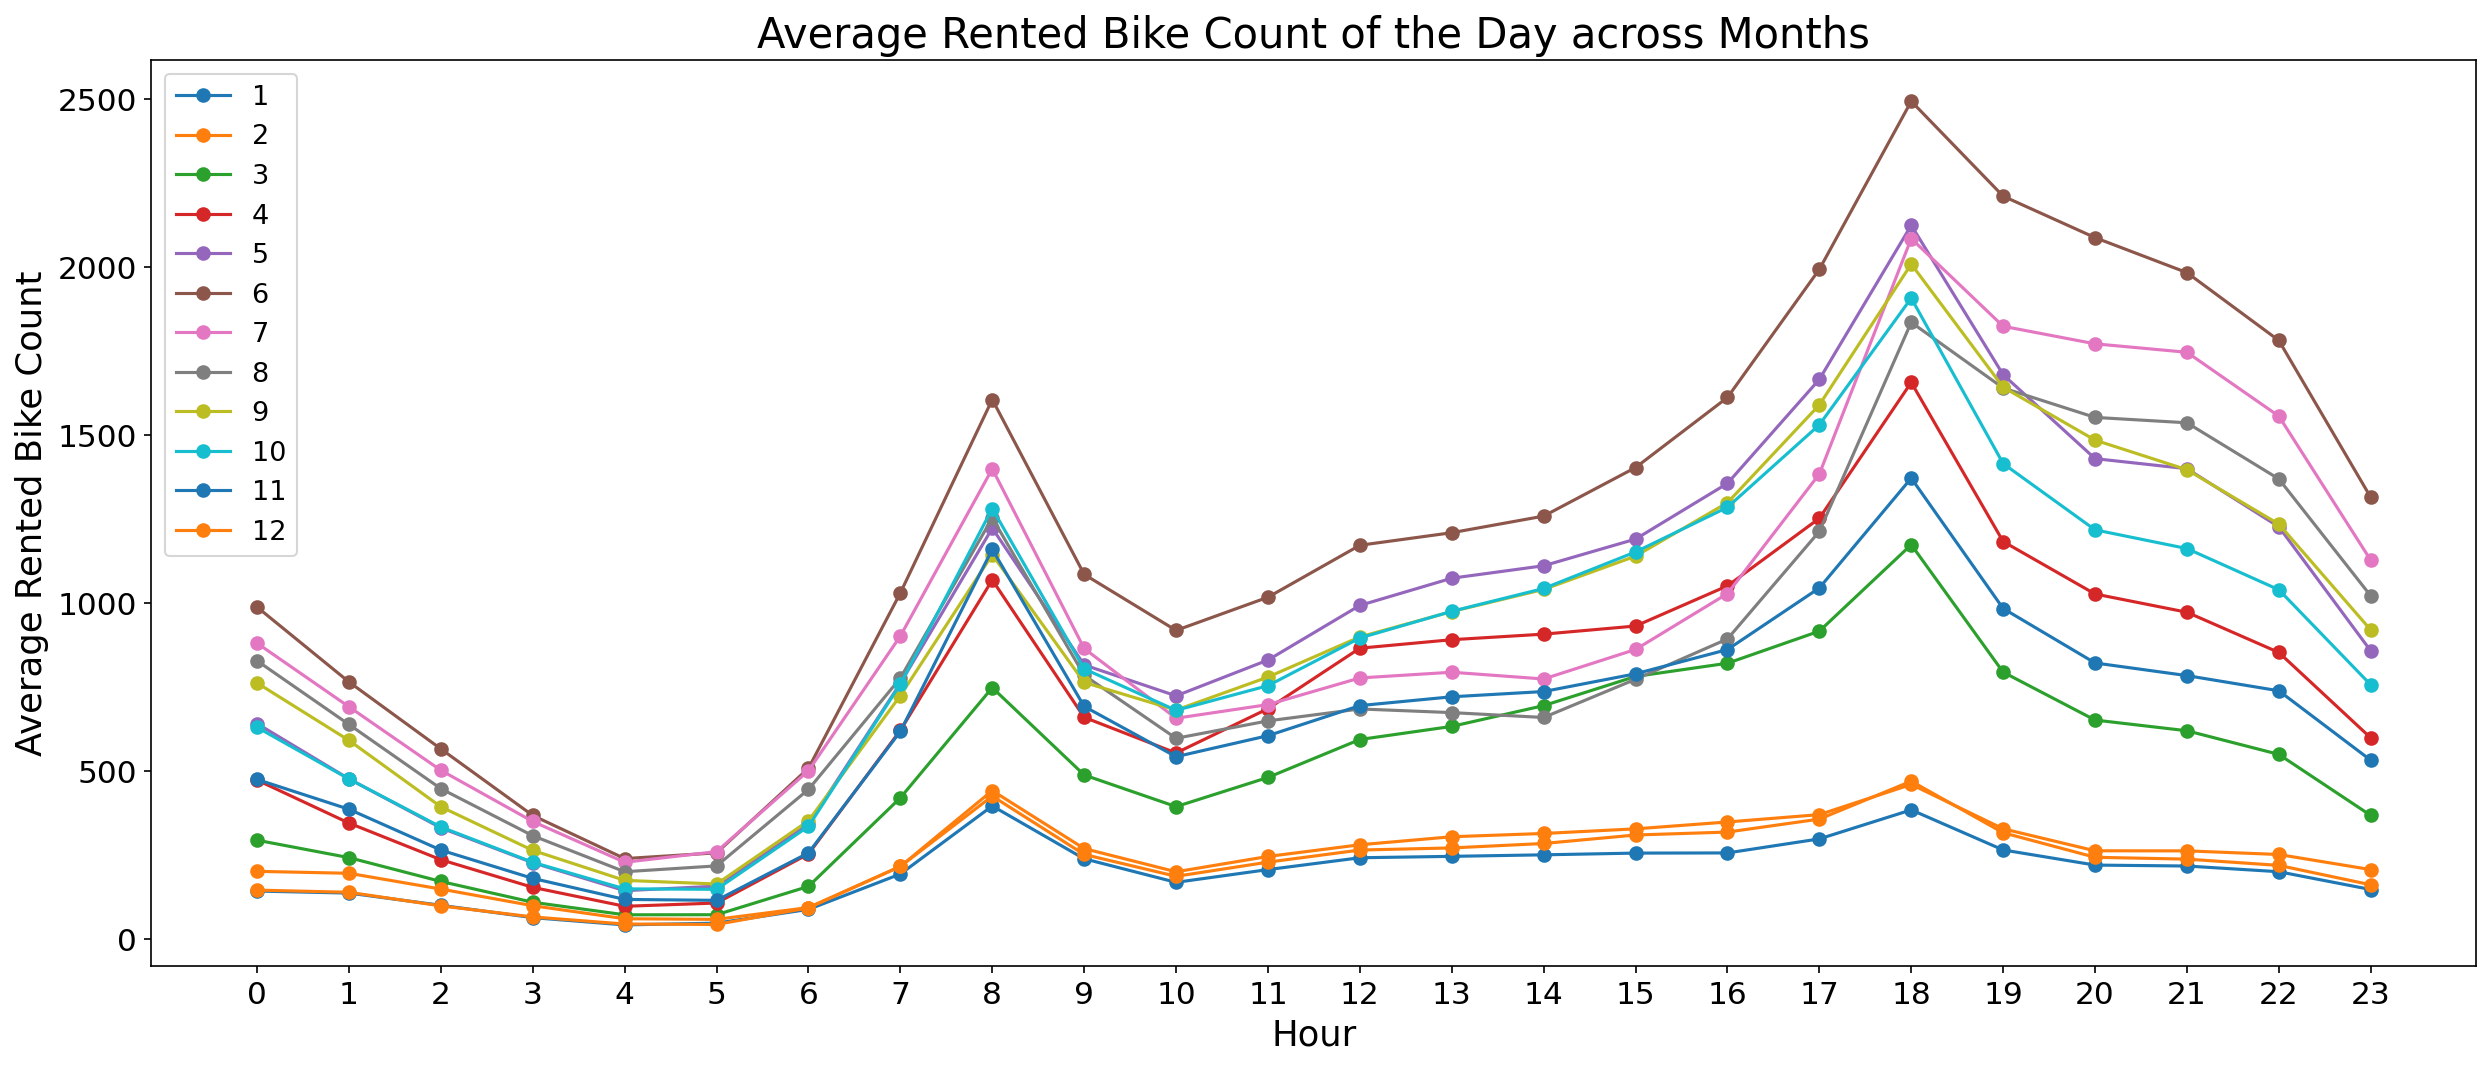

In [ ]:
plt.figure(figsize=(20,8),dpi=150)
for i in range(1,13):
  plt.plot(get_by_value(i,'month'),marker='o',label=i)

plt.xlabel('Hour', fontsize=17)
plt.xticks(ticks=range(0,24), fontsize=15)
plt.ylabel('Average Rented Bike Count', fontsize=17)
plt.yticks(fontsize=15)
plt.title('Average Rented Bike Count of the Day across Months', fontsize=20)
plt.legend(prop={'size': 13})
plt.show()

**Biến "seasons"**

Số lượng các giá trị của feature "seasons":
Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64 



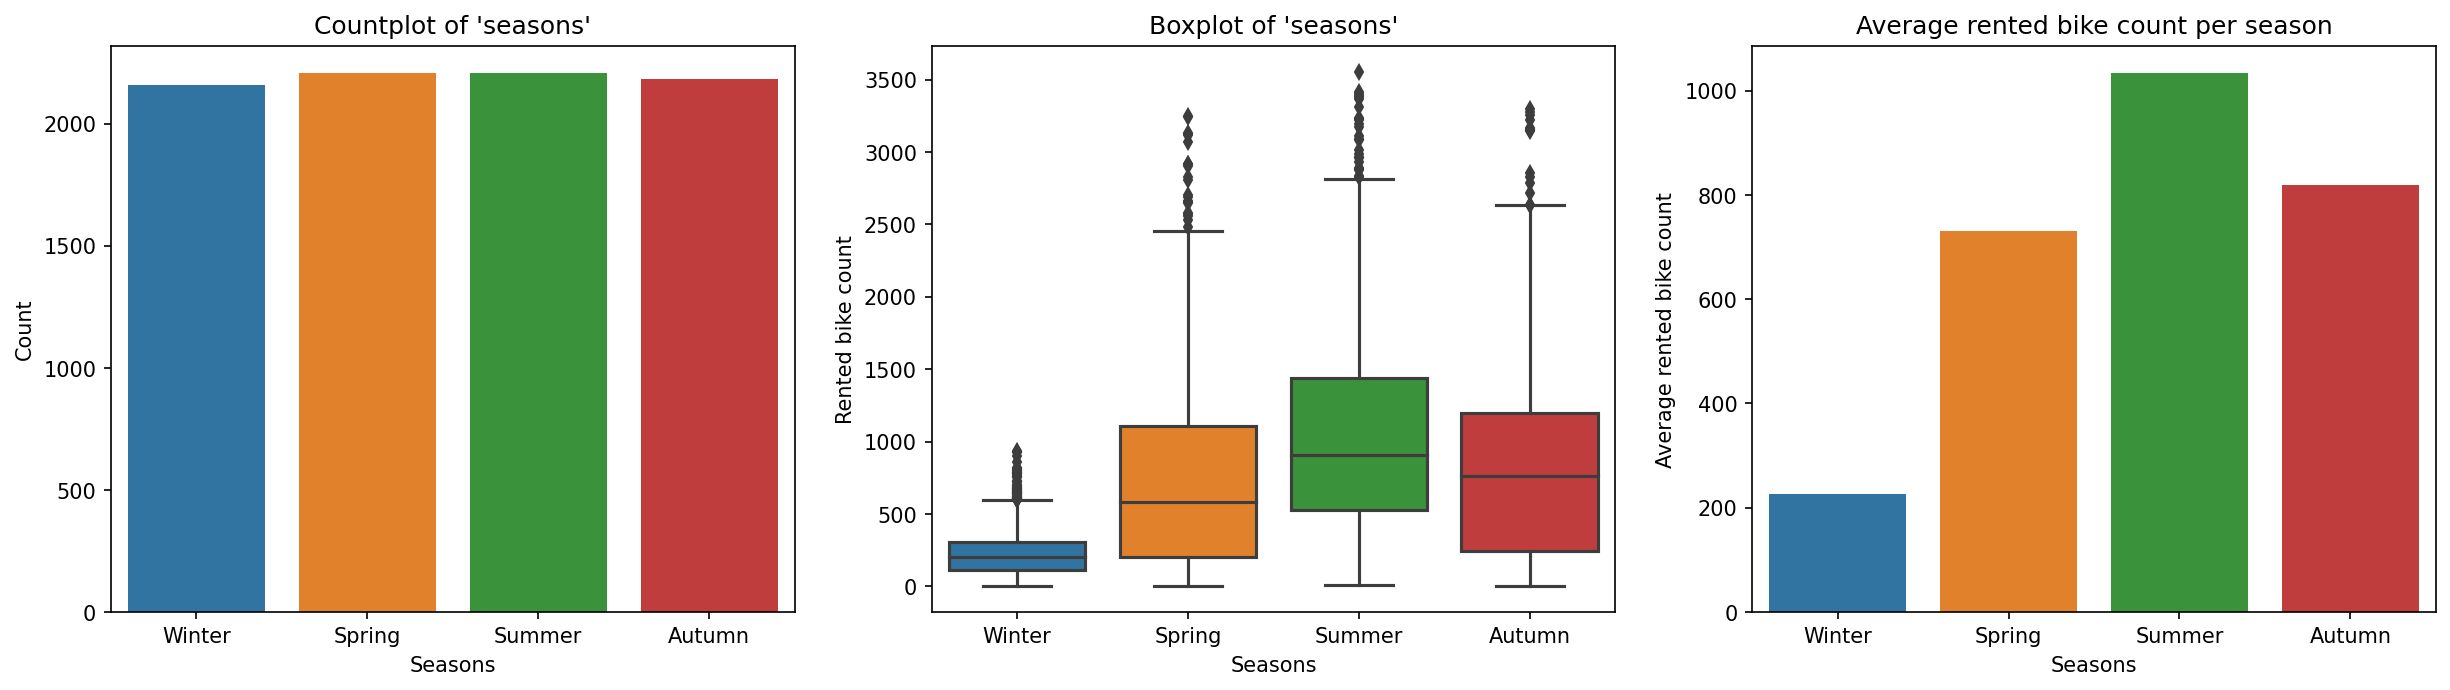

In [ ]:
print('Số lượng các giá trị của feature "seasons":')
print(df['seasons'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'seasons'")
sns.countplot(data = df, x = 'seasons')
plt.xlabel("Seasons")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'seasons'")
sns.boxplot(data = df, x='seasons', y='rented bike count')
plt.xlabel("Seasons")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count per season")
sns.barplot(data = df, x='seasons', y='rented bike count', ci=0)
plt.xlabel("Seasons")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Quan sát **Countplot of 'seasons'** số lượng các giá trị của feature **'seasons'** đầy đủ và gần đều nhau. Các mùa đều xuất hiện giá trị ngoại lệ khi quan sát **Boxplot of 'seasons'**, khi kết hợp quan sát với **Average rented bike count per season** thì thấy được rằng chênh lệch về số lượng xe đạp cho thuê giữa các mùa thể hiện rõ rằng nhất ở mùa đông (Winter) và mùa hè (Summer), cụ thể mùa đông có số lượng xe cho thuê trung bình thấp nhất vì ở thời điểm này nhiệt độ thời tiết hạ xuống rất thấp, dân cư sẽ hạn chế ra ngoài. Ngược lại vào mùa hè, số lượng xe thuê trung bình cao nhất trong các mùa vì mùa hè nhiệt độ sẽ ấm nhất trong năm, nhu cầu thuê xe đạp cao và ổn định vì không gặp trở ngại về thời tiết. Còn mùa xuân, mùa thu không cho thấy sự chênh lệch/khác biệt ở số xe được cho thuê rõ rệt như mùa hè, mùa đông. Ta sẽ tiến hành phân tích ANOVA để xem sự tương quan (correlation) giữa các nhóm trong biến **"seasons"** so với biến mục tiêu **"rented bike count"** và sẽ giữ lại nhóm có correlation cao nhất để phát triển mô hình.

- Biểu diễn mối quan hệ giữa **"seasons"** với **"hour"**

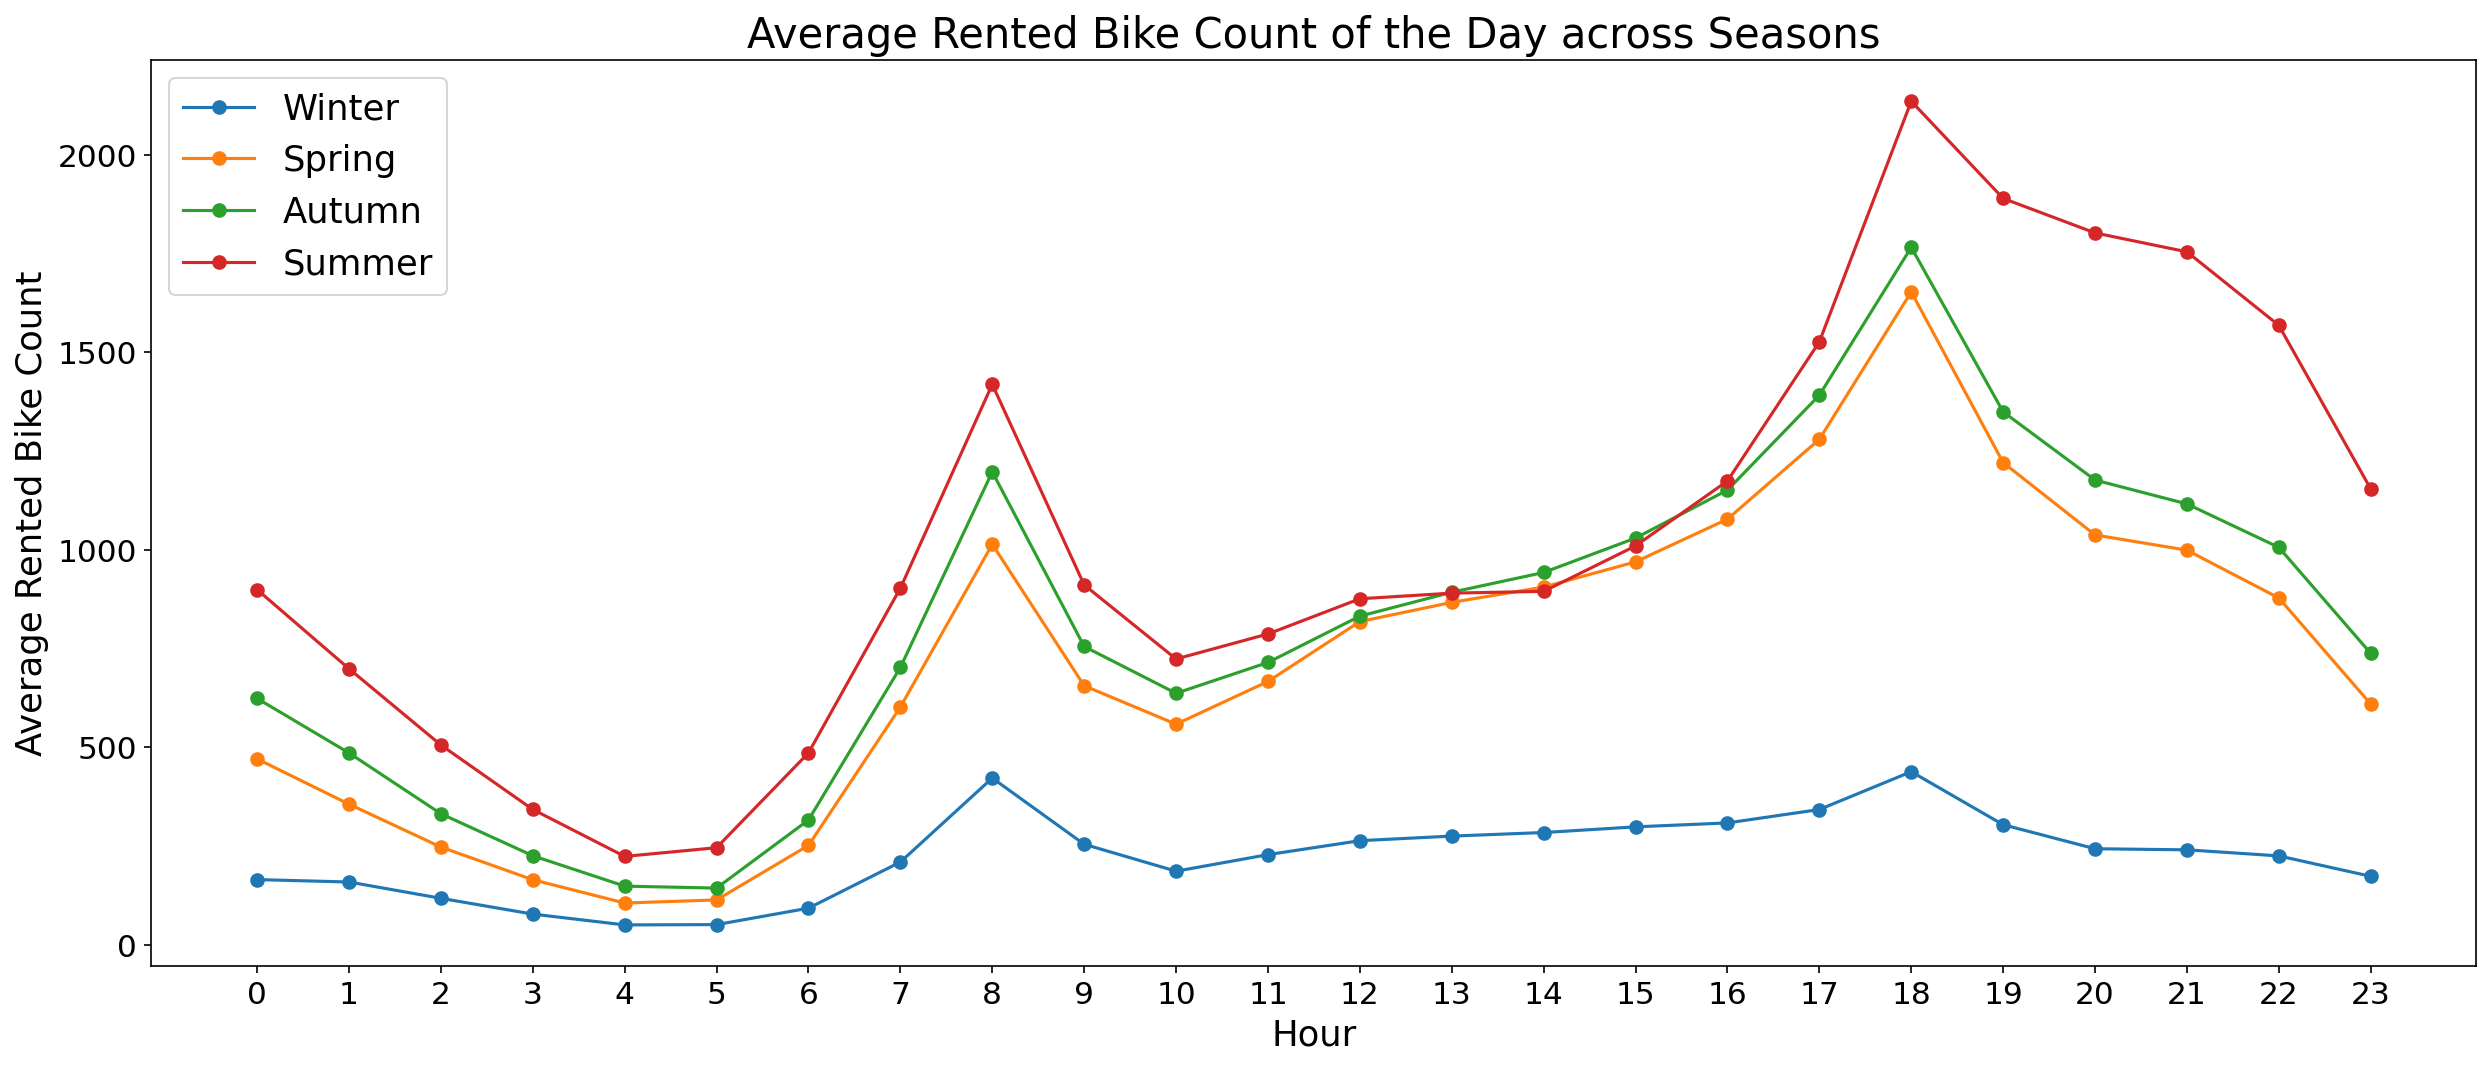

In [ ]:
plt.figure(figsize=(20,8),dpi=150)
plt.plot(get_by_value('Winter','seasons'),marker='o',label='Winter')
plt.plot(get_by_value('Spring','seasons'),marker='o',label='Spring')
plt.plot(get_by_value('Autumn','seasons'),marker='o',label='Autumn')
plt.plot(get_by_value('Summer','seasons'),marker='o',label='Summer')

plt.title('Average Rented Bike Count of the Day across Seasons', fontsize=20)
plt.xlabel('Hour', fontsize=17)
plt.xticks(ticks=range(0,24), fontsize=15)
plt.ylabel('Average Rented Bike Count', fontsize=17)
plt.yticks(fontsize=15)

plt.legend(prop={'size': 17}, loc='upper left')
plt.show()

> **ANOVA**
>
> Tìm correlation giữa các nhóm khác nhau trong cùng một biến phân loại so với biến mục tiêu. Có 2 giá trị:
> - F-test: được tính bằng giá trị trung bình của nhóm mẫu chia cho biến thể trong nhóm mẫu.
> - P-value: kết quả thu được có ý nghĩa thống kê hay không ?
>
> Tiến hành phân tích **ANOVA** cho biến **"seasons"**.



In [ ]:
sl_seasons = sub_lists(['Spring','Summer','Autumn','Winter'])
sl_seasons = [i for i in sl_seasons if i != []]

list_value = []
list_ftest = []
list_pvaluee = []
list_certainly = []

grouped_anova = df[['seasons','rented bike count']].groupby(['seasons'])

for i in sl_seasons:
  if len(i)==1:
    continue
  if len(i)==2:
    f_test,p_valuee = stats.f_oneway(grouped_anova.get_group(i[0])['rented bike count'],
                                     grouped_anova.get_group(i[1])['rented bike count'])
  elif len(i)==3:
    f_test,p_valuee = stats.f_oneway(grouped_anova.get_group(i[0])['rented bike count'],
                                     grouped_anova.get_group(i[1])['rented bike count'],
                                     grouped_anova.get_group(i[2])['rented bike count'])
  elif len(i)==4:
    f_test,p_valuee = stats.f_oneway(grouped_anova.get_group(i[0])['rented bike count'],
                                     grouped_anova.get_group(i[1])['rented bike count'],
                                     grouped_anova.get_group(i[2])['rented bike count'],
                                     grouped_anova.get_group(i[3])['rented bike count'])
  list_value.append(i)
  list_ftest.append(f_test)
  list_pvaluee.append(p_valuee)
  if p_valuee < 0.001:
    list_certainly.append("Strong")
  elif p_valuee < 0.05:
    list_certainly.append("Moderate")
  elif p_valuee < 0.1:
    list_certainly.append("Weak")
  elif p_valuee > 0.1:
    list_certainly.append("No")

In [ ]:
frame_anova_value = pd.DataFrame({'Values':list_value,
                                  'F-test':list_ftest,
                                  'P-value':list_pvaluee,
                                  'Certainly':list_certainly})
frame_anova_value.sort_values(by='F-test', ascending=False, ignore_index=True)

,Values,F-test,P-value,Certainly
0,"[Summer, Winter]",2832.243777,0.000000e+00,Strong
1,"[Autumn, Winter]",1708.068675,3.805575e-315,Strong
2,"[Spring, Winter]",1346.099529,4.102410e-257,Strong
3,"[Summer, Autumn, Winter]",1234.655126,0.000000e+00,Strong
4,"[Spring, Summer, Winter]",1223.899098,0.000000e+00,Strong
5,"[Spring, Autumn, Winter]",798.143534,6.338928e-311,Strong
6,"[Spring, Summer, Autumn, Winter]",776.467815,0.000000e+00,Strong
7,"[Spring, Summer]",236.592354,4.771203e-52,Strong
8,"[Spring, Summer, Autumn]",125.620382,2.864039e-54,Strong
9,"[Summer, Autumn]",112.156453,6.762943e-26,Strong


>> **Nhận xét:**
>>
>> Quan sát bảng, chúng ta thấy rằng nhóm [Summer,Winter] có giá trị F-test lớn nhất do đó nhóm [Summer,Winter] có correlation mạnh nhất với biến mục tiêu **"rented bike count"**. Ta sẽ chọn nhóm giá trị này đại diện cho biến **"seasons"** để phát triển mô hình.

**Biến "holiday"**

Số lượng các giá trị của feature "holiday":
No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 



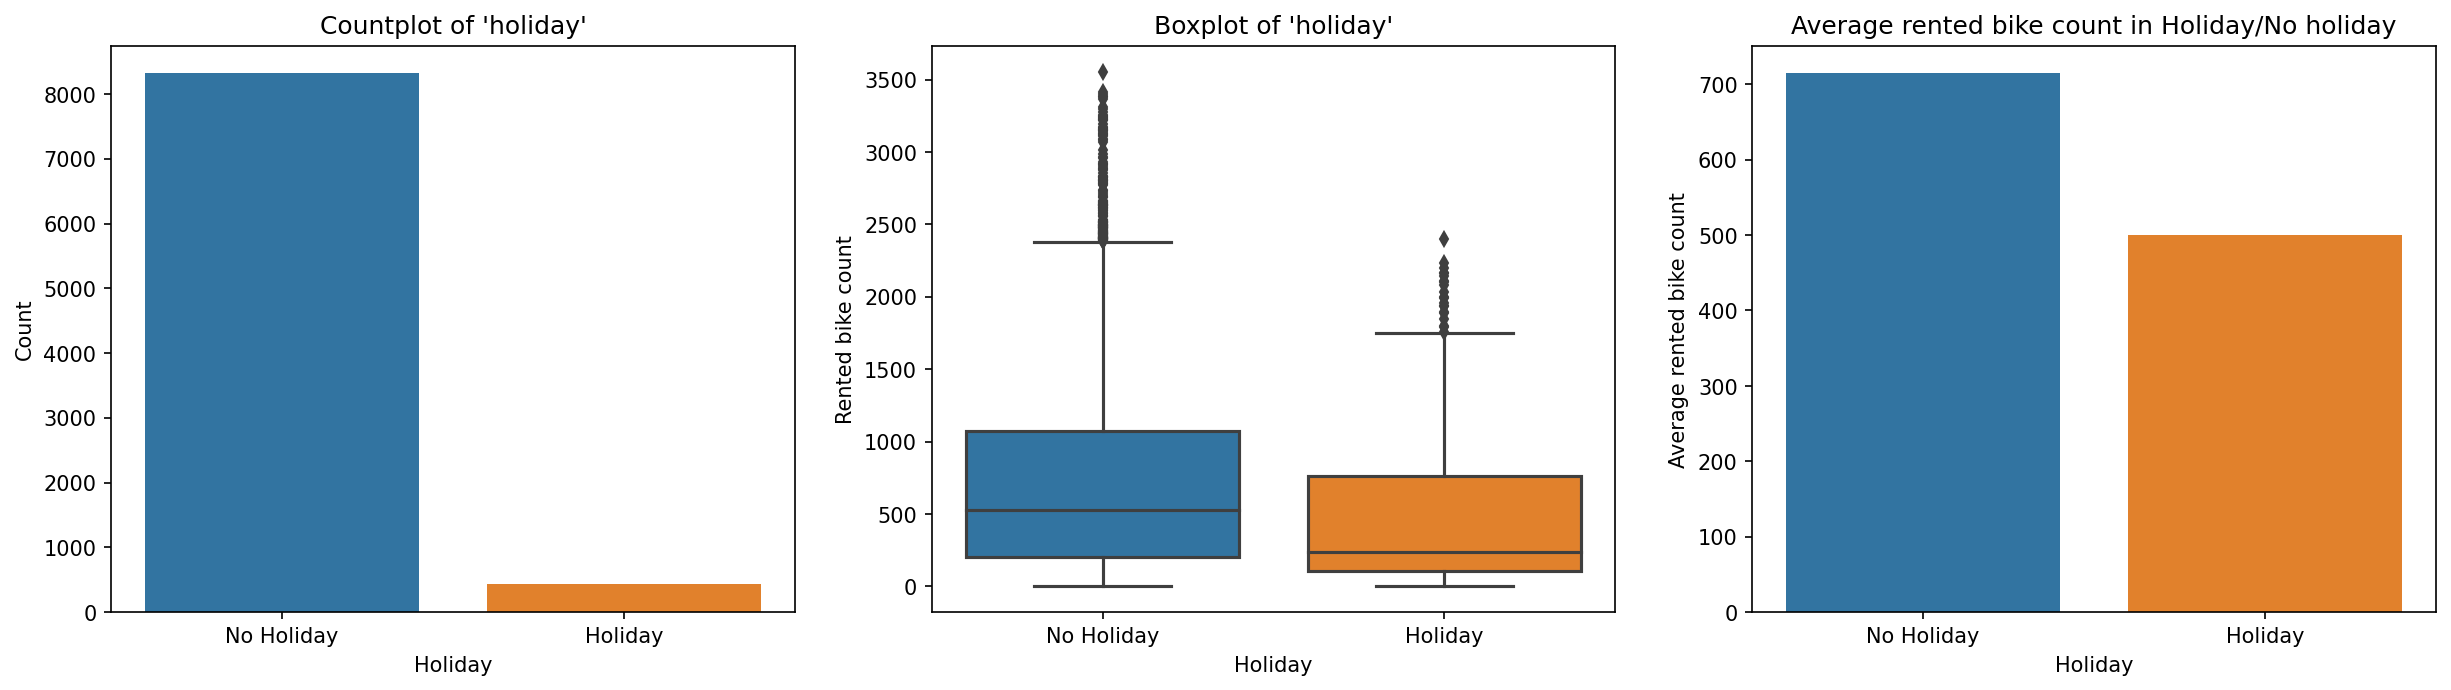

In [ ]:
print('Số lượng các giá trị của feature "holiday":')
print(df['holiday'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'holiday'")
sns.countplot(data = df, x = 'holiday')
plt.xlabel("Holiday")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'holiday'")
sns.boxplot(data = df, x='holiday', y='rented bike count')
plt.xlabel("Holiday")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count in Holiday/No holiday")
sns.barplot(data = df, x='holiday', y='rented bike count', ci=0)
plt.xlabel("Holiday")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Mặc dù khi quan sát **Countplot of 'holiday'** ta thấy số lượng ngày không phải ngày lễ (No Holiday) chiếm rất nhiều so với ngày lễ (Holiday) (8328 > 432) nhưng khi quan sát **Average rented bike count in Holiday/No Holiday** số lượng xe thuê trung bình trong ngày của No Holiday không chênh lệch quá nhiều so với Holiday (một phần chênh lệch cũng do No Holiday có nhiều giá trị hơn), điều đó cho thấy rằng số lượng xe cho thuê trong ngày lễ và không có lễ không khác biệt nhau mấy. Ta sẽ không chọn biến **"holiday"** để phát triển mô hình.

**Biến "functioning Day"**

Số lượng các giá trị của feature "functioning day":
Yes    8465
No      295
Name: functioning day, dtype: int64 



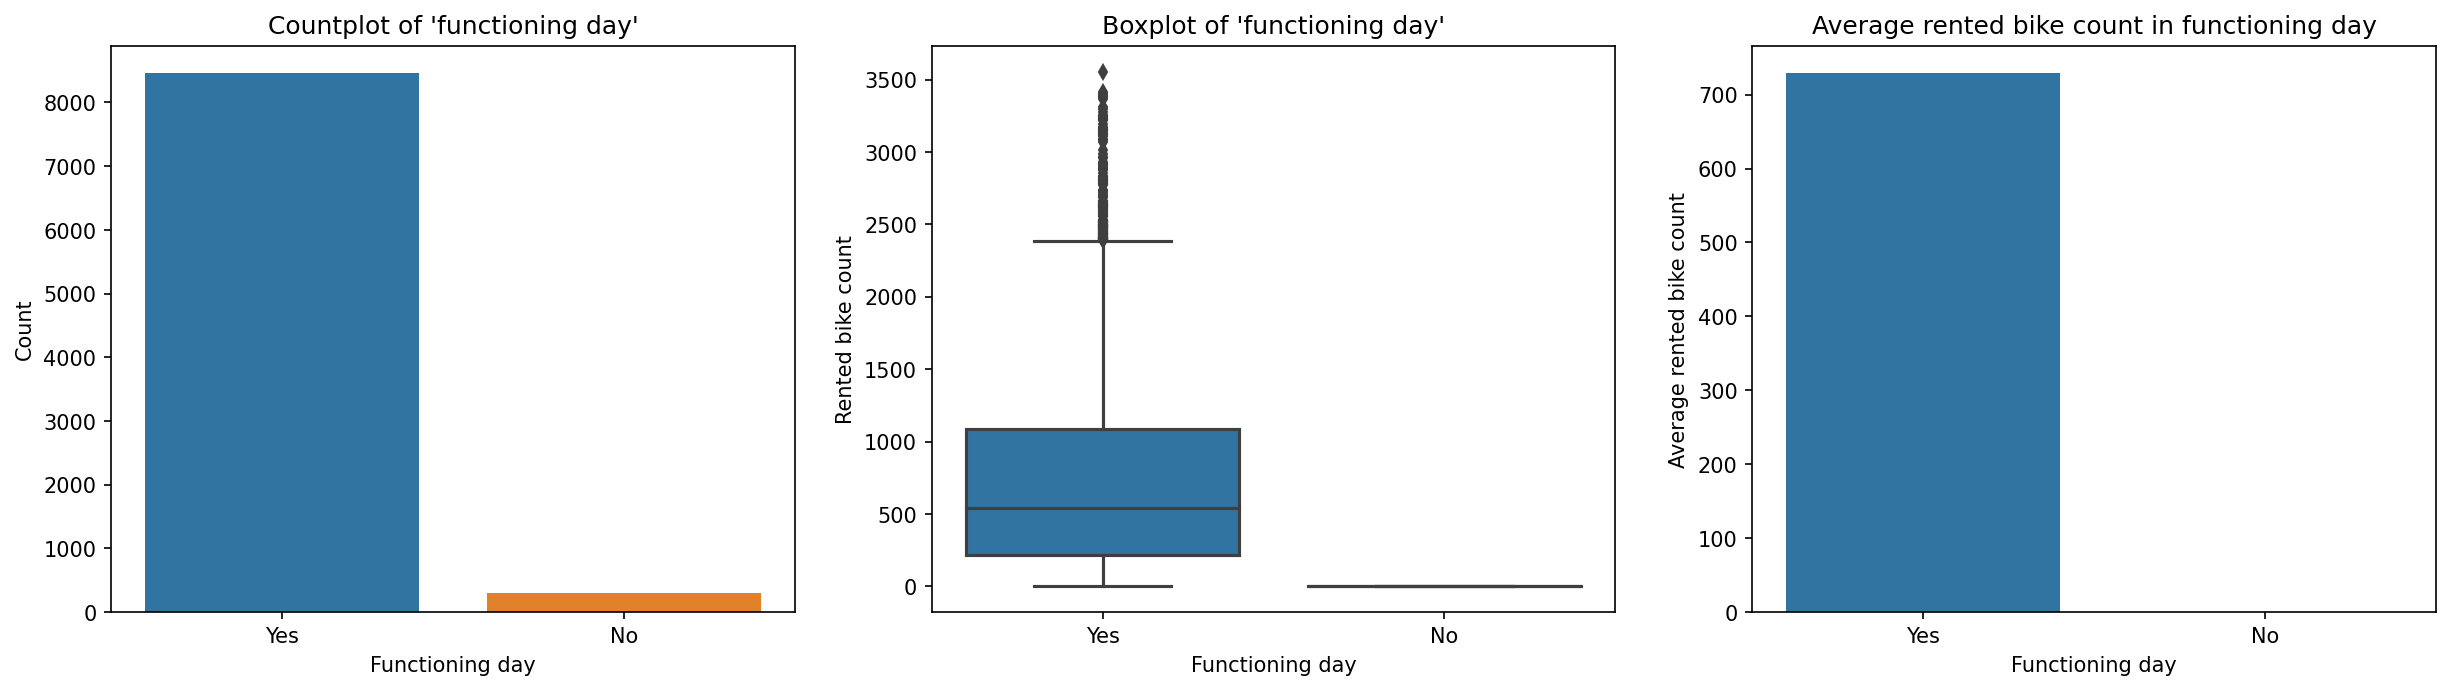

In [ ]:
print('Số lượng các giá trị của feature "functioning day":')
print(df['functioning day'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'functioning day'")
sns.countplot(data = df, x = 'functioning day')
plt.xlabel("Functioning day")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'functioning day'")
sns.boxplot(data = df, x='functioning day', y='rented bike count')
plt.xlabel("Functioning day")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count in functioning day")
sns.barplot(data = df, x='functioning day', y='rented bike count', ci=0)
plt.xlabel("Functioning day")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Mặc dù quan sát **Countplot of 'functioning day'** ta thấy số lượng giá trị của feature **"functioning day"** nghiêng hẳn về giá trị *Yes*, giá trị *No* chiếm rất ít (8465 > 295) nhưng khi quan sát **Boxplot of 'functioning day'** và **Average rented bike count in functioning day** ta thấy nếu **"functioning day"** có giá trị *Yes* thì sẽ có xe thuê, còn nếu có giá trị *No*, thì ngày đó sẽ không có xe thuê, bởi vì đây là ngày mà dịch vụ cho thuê xe không hoạt động. Do đó, biến **"functioning day"** có ảnh hưởng đến biến mục tiêu **"rented bike count"** nên ta sẽ chọn biến này để phát triển mô hình.

**Biến "day of the week"**

Số lượng các giá trị của feature "day of the week":
Friday       1272
Monday       1248
Sunday       1248
Tuesday      1248
Saturday     1248
Wednesday    1248
Thursday     1248
Name: day of the week, dtype: int64 



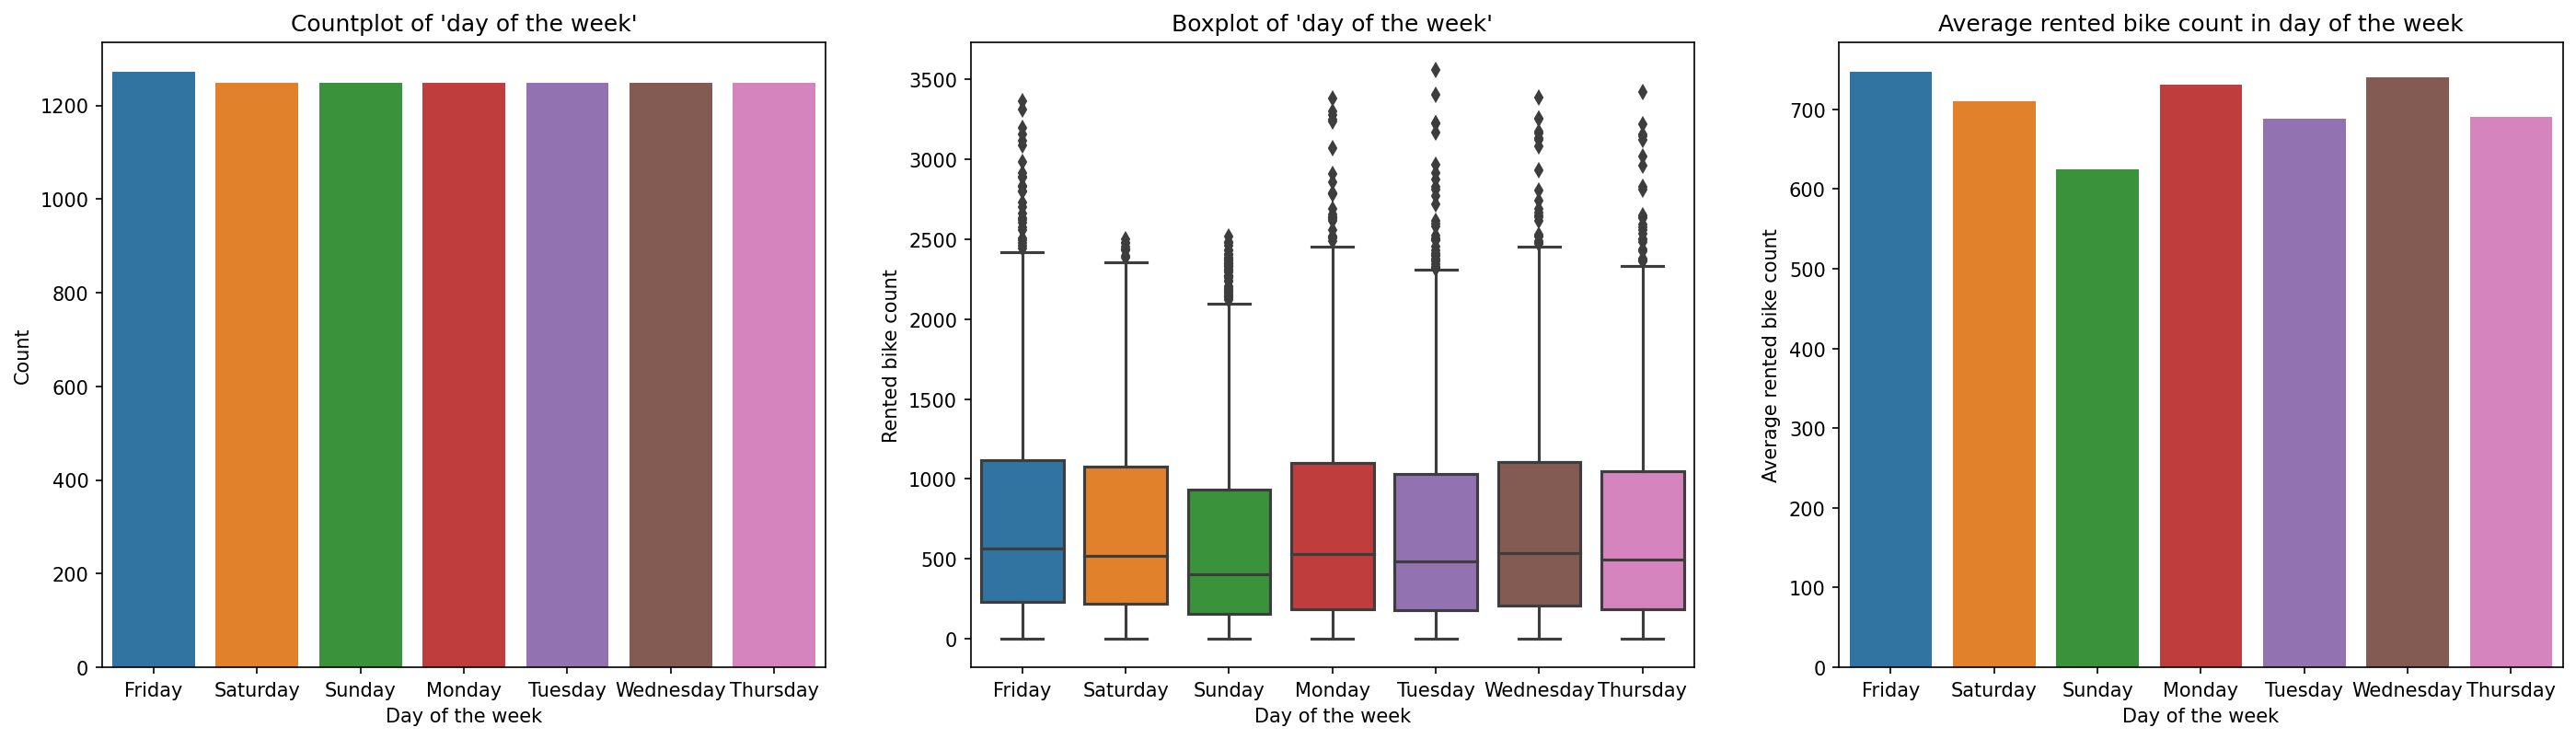

In [ ]:
print('Số lượng các giá trị của feature "day of the week":')
print(df['day of the week'].value_counts(), '\n')

plt.figure(figsize=(23,6), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'day of the week'")
sns.countplot(data = df, x = 'day of the week')
plt.xlabel("Day of the week")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'day of the week'")
sns.boxplot(data = df, x='day of the week', y='rented bike count')
plt.xlabel("Day of the week")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count in day of the week")
sns.barplot(data = df, x='day of the week', y='rented bike count', ci=0)
plt.xlabel("Day of the week")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Quan sát **Countplot of 'day of the week'**, số lượng các giá trị của feature **"day of the week"** đều nhau, đầy đủ. Ở **Boxplot of 'day of the week'** cho thấy các ngày trong tuần đều xuất hiện giá trị ngoại lệ và khi quan sát **Average rented bike count in day of the week** ta thấy rằng trung bình số lượng xe được thuê ở mỗi ngày khác nhau không có sự chênh lệch nhau nhiều, nhu cầu thuê mỗi ngày gần như đều nhau. Vì thế ta sẽ không chọn biến **"day of the week"** để phát triển mô hình.

**Biến "week status"**

Số lượng các giá trị của feature "week status":
Weekday    6264
Weekend    2496
Name: week status, dtype: int64 



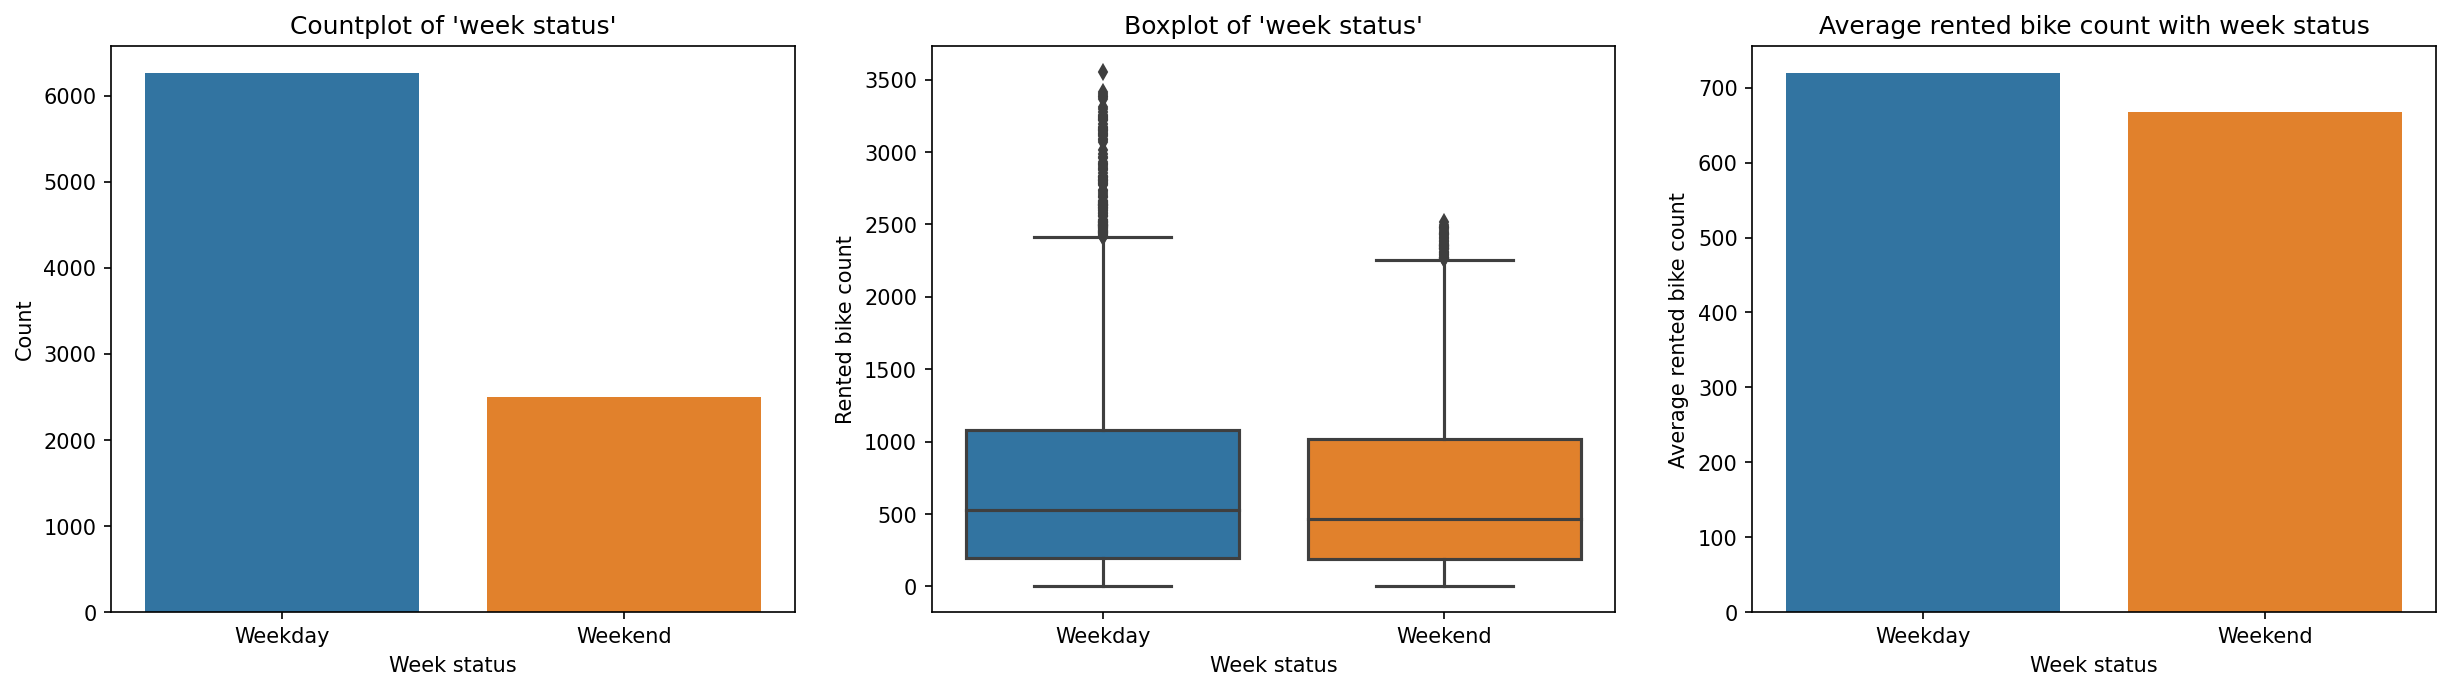

In [ ]:
print('Số lượng các giá trị của feature "week status":')
print(df['week status'].value_counts(), '\n')

plt.figure(figsize=(20,5), dpi = 150)

plt.subplot(1,3,1) 
plt.title("Countplot of 'week status'")
sns.countplot(data = df, x = 'week status')
plt.xlabel("Week status")
plt.ylabel("Count")


plt.subplot(1,3,2) 
plt.title("Boxplot of 'week status'")
sns.boxplot(data = df, x='week status', y='rented bike count')
plt.xlabel("Week status")
plt.ylabel("Rented bike count")

plt.subplot(1,3,3)
plt.title("Average rented bike count with week status")
sns.barplot(data = df, x='week status', y='rented bike count', ci=0)
plt.xlabel("Week status")
plt.ylabel("Average rented bike count")
plt.show()

>> **Nhận xét:**
>>
>> Quan sát **Countplot of 'week status'**, số ngày trong tuần (Weekday) chiếm nhiều hơn gần gấp 3 lần số ngày cuối tuần (Weekend) trong tập dữ liệu (6264 > 2496). **Boxplot of 'week status'** cho thấy cả 2 giá trị Weekday và Weekend đều xuất hiện giá trị ngoại lệ và **Average rented bike count with week status** cho thấy số xe đạp được thuê trung bình ở trong tuần và cuối tuần gần như nhau, không có sự khác biệt đáng kể. Do đó biến **'week status'** không ảnh hưởng đến biến mục tiêu **'rented bike count'**, ta sẽ không chọn biến này để phát triển mô hình.

>>> **Kết luận:**
>>> 
>>> Chúng ta đã chọn được các biến phân loại **"hour", "month", "seasons", "functioning day"** để phát triển mô hình. Tiếp theo chúng ta sẽ mã hóa (encode) các biến có giá trị chữ sang dạng số. 

### **1.3. Dataset**

#### **1.3.1. Xử lý categorical features (encoding)**

- Tiến hành mã hóa (encode) các biến phân loại có giá trị là chữ (**"seasons", "functioning day"**) sang dạng số để các mô hình phân tích có thể sử dụng được.

In [ ]:
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day,day of the week,month,week status
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday


- Encode **"functioning day"** values, *Yes* chuyển sang giá trị 1, *No* chuyển sang giá trị 0

In [ ]:
df["functioning_day"] = np.where(df["functioning day"].str.contains("Yes"), 1, 0)
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day,day of the week,month,week status,functioning_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1


- Encode **"seasons"** với 4 giá trị Spring, Summer, Autumn, Winter được tạo thành 4 biến theo phương pháp get_dummies và 2 biến seasons_Summer, seasons_Winter sẽ được chọn để phát triển mô hình dựa vào ảnh hưởng với biến phụ thuộc đã được phân tích bằng ANOVA.

In [ ]:
Seasons = pd.get_dummies(df['seasons'], prefix='Season')
df = pd.concat([df, Seasons], axis=1)
df

,date,rented bike count,hour,temperature,humidity,wind speed,visibility,dew point temperature,solar radiation,rainfall,snowfall,seasons,holiday,functioning day,day of the week,month,week status,functioning_day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,12,Weekday,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1,1,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1,1,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1,1,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,Weekday,1,1,0,0,0


#### **1.3.2. Bộ dữ liệu với các biến tốt nhất dùng để phát triển mô hình**

> Sau khi trải quá quá trình tiền xử lý dữ liệu, EDA, feature engineering, xử lý các biến phân loại được chọn có giá trị là chữ và có được các biến quan trọng nhất, tiếp theo ta sẽ tiến hành tạo ra bộ dữ liệu với các biến này.

In [ ]:
df_final = df[['hour', 'month', 'temperature', 'humidity', 'visibility', 'dew point temperature', 'solar radiation', 'functioning_day', 'Season_Summer', 'Season_Winter', 'rented bike count']]
df_final

,hour,month,temperature,humidity,visibility,dew point temperature,solar radiation,functioning_day,Season_Summer,Season_Winter,rented bike count
0,0,12,-5.2,37,2000,-17.6,0.0,1,0,1,254
1,1,12,-5.5,38,2000,-17.6,0.0,1,0,1,204
2,2,12,-6.0,39,2000,-17.7,0.0,1,0,1,173
3,3,12,-6.2,40,2000,-17.6,0.0,1,0,1,107
4,4,12,-6.0,36,2000,-18.6,0.0,1,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...
8755,19,11,4.2,34,1894,-10.3,0.0,1,0,0,1003
8756,20,11,3.4,37,2000,-9.9,0.0,1,0,0,764
8757,21,11,2.6,39,1968,-9.9,0.0,1,0,0,694
8758,22,11,2.1,41,1859,-9.8,0.0,1,0,0,712


## **Phần 2: Phát triển mô hình, so sánh hiệu suất, đánh giá và tiến hành dự đoán**

### **2.1. Phát triển mô hình**

- Chia dữ liệu 

In [ ]:
x = df_final.drop(['rented bike count'], axis=1)
y = df_final['rented bike count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### **2.1.1. Polynomial Regression**

In [ ]:
sl = sub_lists(['hour', 'month', 'temperature', 'humidity', 'visibility','dew point temperature', 'solar radiation', 'functioning_day','Season_Summer', 'Season_Winter'])

sl = [i for i in sl if i != []]

print("Có",len(sl),"tập con đặc trưng được tạo ra")

Có 1023 tập con đặc trưng được tạo ra


In [ ]:
# VIẾT HÀM TẠO TẠO RA MODEL, KQ ĐÁNH GIÁ VÀ LƯU CHÚNG THÀNH DATAFRAME
# Tạo các list để thêm giá trị vào 
model = []
list_feature_details = []
list_rmse = []
list_r2_train = []
list_r2_test = []
fold_4 = []
fold_5 = []
std_4 = []
std_5 = []
note = []
 
dem = 0
dict_model = {}
dict_degree = {}
dict_scores = {}
j = 0
# Viết hàm 
for i in sl:
  for j in range(1,5):
    
    # Thêm các feature vào list
    list_feature_details.append(i)  

    # Huấn luyện mô hình trên tập train với bậc j
    pr = PolynomialFeatures(degree=j, include_bias=False)
    x_train_poly = pr.fit_transform(x_train[i])
    x_test_poly = pr.fit_transform(x_test[i])
    lm = LinearRegression()
    lm.fit(x_train_poly,y_train)

    # Dự đoán kết quả trên tập train & test
    y_train_pred = lm.predict(x_train_poly)
    y_test_pred = lm.predict(x_test_poly)

    # Kết quả R2 Score trên tập train
    r2_train = r2_score(y_train, y_train_pred)
    list_r2_train.append(r2_train)

    # Kết quả R2 Score trên tập test
    r2_test = r2_score(y_test, y_test_pred)
    list_r2_test.append(r2_test)

    # Kết quả RMSE trên tập test
    rmse = sqrt(mean_squared_error(y_test, y_test_pred))
    list_rmse.append(rmse)

    # Kiểm định kết quả bằng 4-fold cross validation
    x_poly = pr.fit_transform(x[i])
    lr_4 = LinearRegression()
    kfold_4 = KFold(n_splits=4, shuffle=True, random_state=0)
    scores_4 = cross_val_score(lr_4, x_poly, y, cv=kfold_4)
    fold_4.append(np.mean(scores_4))
    std_4.append(np.std(scores_4))

    # Kiểm định kết quả bằng 5-fold cross validation
    lr_5 = LinearRegression()
    kfold_5 = KFold(n_splits=5, shuffle=True, random_state=0)
    scores_5 = cross_val_score(lr_5, x_poly, y, cv=kfold_5)
    fold_5.append(np.mean(scores_5))
    std_5.append(np.std(scores_5))

    # Thêm vào model, note các thông tin cần thiết
    if j==1:
      if len(i) == 1:
        model.append("Simple Linear Regression")
        note.append('test_size = 0.2, ' + f'num feature = {len(i)}')
      else:
        model.append("Multiple Linear Regression")
        note.append('test_size = 0.2, ' + f'num feature = {len(i)}')
    else:
      model.append("Polynomial Regression")
      note.append('test_size = 0.2, ' + f'Degree = {j}, ' + f'num feature = {len(i)}')

    
    # deploy mô hình 
    lr_f = LinearRegression()
    lr_f.fit(x_poly, y)
    
    if dem % 4 == 0:
      max = 0
    if np.mean(scores_5) > max:
      max = np.mean(scores_5)
      dict_model[str(i)] = lr_f
      dict_degree[str(i)] = dem % 4 + 1

      # so sánh hiệu suất mô hình (5-fold cv)
      dict_scores[str(i)] = max
    dem +=1
    print(dem)


- Danh sách các mô hình 

In [ ]:
dataframe_regression = []
a = {'Model':model,
    'Feature details': list_feature_details,
    'RMSE': list_rmse,
    'R^2 train': list_r2_train,
    'R^2 test':list_r2_test,
    '4 fold - mean': fold_4,
    '4 fold - std': std_4,
    '5 fold - mean': fold_5,
    '5 fold - std': std_5,
     'note:': note}
dataframe_regression = pd.DataFrame.from_dict(a, orient='index')
dataframe_regression = dataframe_regression.transpose()

# save to csv
dataframe_regression_save = dataframe_regression.copy()
dataframe_regression_save.to_csv("List_regression_model.csv", index=False)

# show df
dataframe_regression


,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note:
0,Simple Linear Regression,[hour],594.805,0.171474,0.154661,0.168051,0.00743184,0.167913,0.00926715,"test_size = 0.2, num feature = 1"
1,Polynomial Regression,[hour],594.567,0.175006,0.155339,0.170974,0.00803965,0.170748,0.0106156,"test_size = 0.2, Degree = 2, num feature = 1"
2,Polynomial Regression,[hour],577.822,0.221882,0.202246,0.217826,0.00710779,0.217309,0.0108008,"test_size = 0.2, Degree = 3, num feature = 1"
3,Polynomial Regression,[hour],577.482,0.223028,0.203183,0.218846,0.00740843,0.218236,0.0111685,"test_size = 0.2, Degree = 4, num feature = 1"
4,Simple Linear Regression,[month],641.401,0.0177482,0.0170306,0.0175553,0.00253715,0.0172647,0.00235624,"test_size = 0.2, num feature = 1"
...,...,...,...,...,...,...,...,...,...,...
4087,Polynomial Regression,"[month, temperature, humidity, visibility, dew...",478.029,0.701649,0.454004,-0.108801,0.883713,0.547642,0.0693275,"test_size = 0.2, Degree = 4, num feature = 9"
4088,Multiple Linear Regression,"[hour, month, temperature, humidity, visibilit...",444.527,0.538359,0.527853,0.535122,0.00340832,0.535193,0.00532683,"test_size = 0.2, num feature = 10"
4089,Polynomial Regression,"[hour, month, temperature, humidity, visibilit...",355.778,0.703379,0.697561,0.699224,0.00700336,0.698674,0.00339343,"test_size = 0.2, Degree = 2, num feature = 10"
4090,Polynomial Regression,"[hour, month, temperature, humidity, visibilit...",297.477,0.804386,0.78856,0.788222,0.0122116,0.787999,0.00467049,"test_size = 0.2, Degree = 3, num feature = 10"


- Danh sách các mô hình tốt nhất 

In [ ]:
# Load saved file
dataframe_regression = pd.read_csv("/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/List_regression_model.csv")

reg_final = dataframe_regression[dataframe_regression['5 fold - mean']>0.83]
reg_final.reset_index(drop=True, inplace=True)
reg_final

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note:
0,Polynomial Regression,"['hour', 'month', 'temperature', 'humidity', '...",263.759314,0.841843,0.833775,0.833002,0.005435,0.832517,0.005907,"test_size = 0.2, Degree = 4, num feature = 7"
1,Polynomial Regression,"['hour', 'month', 'temperature', 'humidity', '...",264.731902,0.840521,0.832547,0.833299,0.004761,0.833107,0.004325,"test_size = 0.2, Degree = 4, num feature = 7"
2,Polynomial Regression,"['hour', 'month', 'temperature', 'dew point te...",265.617143,0.837044,0.831425,0.830582,0.006630,0.830137,0.005247,"test_size = 0.2, Degree = 4, num feature = 7"
3,Polynomial Regression,"['hour', 'month', 'humidity', 'dew point tempe...",265.549046,0.840049,0.831511,0.832148,0.005262,0.831770,0.004847,"test_size = 0.2, Degree = 4, num feature = 7"
4,Polynomial Regression,"['hour', 'month', 'temperature', 'humidity', '...",261.672947,0.846485,0.836394,0.835846,0.004953,0.835867,0.005276,"test_size = 0.2, Degree = 4, num feature = 8"
5,Polynomial Regression,"['hour', 'month', 'temperature', 'dew point te...",262.188425,0.843334,0.835749,0.833447,0.006761,0.833260,0.006076,"test_size = 0.2, Degree = 4, num feature = 8"
6,Polynomial Regression,"['hour', 'month', 'humidity', 'dew point tempe...",265.969034,0.845894,0.830978,0.833898,0.005951,0.833454,0.006093,"test_size = 0.2, Degree = 4, num feature = 8"


#### **2.1.2. Random Forest Regression**

In [ ]:
# VIẾT HÀM TẠO TẠO RA MODEL, KQ ĐÁNH GIÁ VÀ LƯU CHÚNG THÀNH DATAFRAME
# Tạo các list để thêm giá trị vào 
model = []
list_feature_details = []
list_rmse = []
list_r2_train = []
list_r2_test = []
fold_4 = []
fold_5 = []
std_4 = []
std_5 = []
note = []
 
dict_model_rfr = {}
dict_scores_rfr = {}

j=0
# Viết hàm 
for i in sl:  
  # Thêm các feature vào list
  list_feature_details.append(i)  
  
  # Tìm ra tham số tốt nhất ứng với các đặc trưng huấn luyện
  forest_reg = RandomForestRegressor()
  param_grid = [{'n_estimators': [15], 'max_depth': [5,10,15]}]
  grid_search = GridSearchCV(forest_reg, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=0), scoring='r2')
  grid_search.fit(x[i], y)
  best_params = grid_search.best_params_

  # Huấn luyện mô hình trên tập train với tham số tốt nhất
  rfr = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=0)
  rfr.fit(x_train[i], y_train)
  y_train_pred = rfr.predict(x_train[i])
  y_test_pred = rfr.predict(x_test[i])

  # Kết quả R2 Score trên tập train
  r2_train = r2_score(y_train, y_train_pred)
  list_r2_train.append(r2_train)

  # Kết quả R2 Score trên tập test
  r2_test = r2_score(y_test, y_test_pred)
  list_r2_test.append(r2_test)

  # Kết quả RMSE trên tập test
  rmse = sqrt(mean_squared_error(y_test, y_test_pred))
  list_rmse.append(rmse)

  # Kiểm định kết quả bằng 4-fold cross validation với tham số tốt nhất
  rfr_4 = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=0)
  kfold_4 = KFold(n_splits=4, shuffle=True, random_state=0)
  scores_4 = cross_val_score(rfr_4, x[i], y, cv=kfold_4)
  fold_4.append(np.mean(scores_4))
  std_4.append(np.std(scores_4))

  # Kiểm định kết quả bằng 5-fold cross validation với tham số tốt nhất
  rfr_5 = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=0)
  kfold_5 = KFold(n_splits=5, shuffle=True, random_state=0)
  scores_5 = cross_val_score(rfr_5, x[i], y, cv=kfold_5)
  fold_5.append(np.mean(scores_5))
  std_5.append(np.std(scores_5))

  # Thêm vào note
  model.append("Random Forest Regressor")
  note.append(f'num ft = {len(i)}, ' + f'n_estimators=15, ' + f'max_depth = {best_params["max_depth"]}')
  
  # Lưu mô hình vào dict dùng để deploy
  rfr_dpl = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=0)
  rfr_dpl.fit(x[i],y)
  dict_model_rfr[str(i)] = rfr_dpl
  dict_scores_rfr[str(i)] = np.mean(scores_5) 
  
  j+=1
  print(j)

- Danh sách các mô hình được huấn luyện

In [ ]:
dataframe_rfr = pd.DataFrame({'Model':model,
                          'Feature details': list_feature_details,
                          'RMSE': list_rmse,
                          'R^2 train': list_r2_train,
                          'R^2 test':list_r2_test,
                          '4 fold - mean': fold_4,
                          '4 fold - std': std_4,
                          '5 fold - mean': fold_5,
                          '5 fold - std': std_5,
                          'note': note})
dataframe_rfr.to_csv("List_model_rfr.csv", index=False)
dataframe_rfr

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note
0,Random Forest Regressor,[hour],549.448516,0.294749,0.278668,0.289049,0.012403,0.286256,0.019600,"num ft = 1, n_estimators=15, max_depth = 10"
1,Random Forest Regressor,[month],569.671720,0.260535,0.224592,0.250904,0.019230,0.250726,0.022968,"num ft = 1, n_estimators=15, max_depth = 10"
2,Random Forest Regressor,"[hour, month]",416.037424,0.639873,0.586433,0.607572,0.015349,0.611389,0.019183,"num ft = 2, n_estimators=15, max_depth = 10"
3,Random Forest Regressor,[temperature],554.168737,0.330795,0.266221,0.303111,0.022531,0.305209,0.024433,"num ft = 1, n_estimators=15, max_depth = 5"
4,Random Forest Regressor,"[hour, temperature]",423.791069,0.614856,0.570874,0.587956,0.014067,0.591210,0.016201,"num ft = 2, n_estimators=15, max_depth = 5"
...,...,...,...,...,...,...,...,...,...,...
1018,Random Forest Regressor,"[hour, month, humidity, visibility, dew point ...",249.323046,0.952779,0.851473,0.853694,0.007540,0.853639,0.005140,"num ft = 9, n_estimators=15, max_depth = 15"
1019,Random Forest Regressor,"[temperature, humidity, visibility, dew point ...",387.349512,0.771815,0.641502,0.643933,0.012024,0.647132,0.013404,"num ft = 8, n_estimators=15, max_depth = 10"
1020,Random Forest Regressor,"[hour, temperature, humidity, visibility, dew ...",268.166911,0.962744,0.828173,0.840135,0.004795,0.842106,0.005667,"num ft = 9, n_estimators=15, max_depth = 15"
1021,Random Forest Regressor,"[month, temperature, humidity, visibility, dew...",368.594024,0.931628,0.675378,0.692708,0.008522,0.690884,0.016239,"num ft = 9, n_estimators=15, max_depth = 15"


- Danh sách các mô hình Random forest regressor tốt nhất

In [ ]:
# Load saved file
dataframe_rfr = pd.read_csv("/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/List_model_rfr.csv")

rfr_final = dataframe_rfr[dataframe_rfr['5 fold - mean']>0.8586]
rfr_final.reset_index(drop=True, inplace=True)
rfr_final

,Model,Feature details,RMSE,R^2 train,R^2 test,4 fold - mean,4 fold - std,5 fold - mean,5 fold - std,note
0,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",249.890322,0.965598,0.850796,0.857173,0.005826,0.858712,0.005740,"num ft = 7, n_estimators=15, max_depth = 15"
1,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",248.234882,0.967804,0.852766,0.858281,0.004844,0.859306,0.006527,"num ft = 8, n_estimators=15, max_depth = 15"
2,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",249.222841,0.965574,0.851592,0.856133,0.005242,0.858880,0.006253,"num ft = 8, n_estimators=15, max_depth = 15"
3,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",251.353968,0.965538,0.849043,0.857498,0.005787,0.859782,0.007892,"num ft = 8, n_estimators=15, max_depth = 15"
4,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",249.490262,0.967113,0.851274,0.858179,0.003587,0.859194,0.006841,"num ft = 9, n_estimators=15, max_depth = 15"
5,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",249.588479,0.965253,0.851156,0.856970,0.005233,0.859462,0.007243,"num ft = 9, n_estimators=15, max_depth = 15"
6,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",248.176136,0.966540,0.852836,0.858933,0.002514,0.858967,0.007297,"num ft = 9, n_estimators=15, max_depth = 15"
7,Random Forest Regressor,"['hour', 'month', 'temperature', 'humidity', '...",249.616708,0.967659,0.851123,0.858439,0.004052,0.858686,0.005833,"num ft = 10, n_estimators=15, max_depth = 15"


#### **2.1.3. Lưu các mô hình**

In [ ]:
# Save dict_degree to JSON file (lưu file)

file_name = '/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/dict_degree.json'
with open(file_name, 'w') as fp:
    json.dump(dict_degree, fp, indent=4)

In [ ]:
# Load file dict_degree (gọi lại file đã lưu)

file_name = '/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/dict_degree.json'
with open(file_name, 'r') as fp:
    dict_degree = json.load(fp)

In [ ]:
# Tạo file stt_model và lưu mô hình ứng với stt
stt=1
stt_model = {}
for i in sl:
  stt_model[str(i)] = stt

  # Save model regression
  filename_reg = f'/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/Model Regression Deploy/regression_model_{stt}.pkl'
  model_reg = dict_model[str(i)]
  joblib.dump(model_reg, filename_reg)
  
  # Save model RFR
  filename_rfr = f'/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/Model RFR Deploy/rfr_model_{stt}.pkl'
  model_rfr = dict_model_rfr[str(i)]
  joblib.dump(model_rfr, filename_rfr)
  stt+=1

In [ ]:
# Save stt_model to JSON file (lưu file)

file_name = '/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/stt_model.json'
with open(file_name, 'w') as fp:
    json.dump(stt_model, fp, indent=4)

In [ ]:
# Load file stt_model (gọi lại file đã lưu)
file_name = '/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/stt_model.json'
with open(file_name, 'r') as fp:
    stt_model = json.load(fp)

### **2.2. So sánh hiệu suất và đánh giá**

- Mô hình tốt nhất của Polynomial Regression và Random Forest Regression


Mô hình | R2 Score (5-fold CV) | RMSE | Biến
--- | --- | --- | ---
Polynomial Regression | 0.835867 | 261.673 | ['hour', 'month', 'temperature', 'humidity', 'solar radiation', 'functioning_day', 'Season_Summer', 'Season_Winter']
Random Forest Regression | 0.859782 | 251.353968 | ['hour', 'month', 'temperature', 'humidity', 'visibility', 'solar radiation', 'functioning_day', 'Season_Winter']

- Ta sẽ tiến hành so sánh hiệu suất giữa mô hình Polynomial Regression với Random Forest Regression bằng mean R2 Score của 5-fold cross validation khi được huấn luyện ở các tập con đặc trưng khác nhau (ở mỗi tập con đặc trưng, mô hình Polynomial Regression và RF Regression sẽ dùng kết quả tốt nhất để so sánh).

In [ ]:
# Tạo table để so sánh hiệu suất giữa mô hình Polynomial Regression với Random Forest Regressor
list_reg_result = []
list_rfr_result = []
list_features = []
for i in sl:
  r2_reg = dict_scores[str(i)]
  list_reg_result.append(r2_reg)

  r2_rfr = dict_scores_rfr[str(i)]
  list_rfr_result.append(r2_rfr)

  list_features.append(i)

df_compare = pd.DataFrame({'Feature':list_features,
                           'Regression result':list_reg_result,
                           'RFR result':list_rfr_result})
df_compare.to_csv("df_compare_model.csv", index=False)
df_compare

In [ ]:
# Load saved file
df_compare = pd.read_csv("/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/df_compare_model.csv")
df_compare

,Feature,Regression result,RFR result
0,['hour'],0.218236,0.286256
1,['month'],0.228783,0.250726
2,"['hour', 'month']",0.493422,0.611389
3,['temperature'],0.306901,0.305209
4,"['hour', 'temperature']",0.535691,0.591210
...,...,...,...
1018,"['hour', 'month', 'humidity', 'visibility', 'd...",0.804347,0.853639
1019,"['temperature', 'humidity', 'visibility', 'dew...",0.604235,0.647132
1020,"['hour', 'temperature', 'humidity', 'visibilit...",0.772665,0.842106
1021,"['month', 'temperature', 'humidity', 'visibili...",0.640369,0.690884


- So sánh kết quả giữa 2 mô hình ứng với mỗi trường hợp tập con đặc trưng

In [ ]:
a=0
for i in range(df_compare.shape[0]):
  if df_compare.loc[i,'Regression result'] > df_compare.loc[i,'RFR result']:
    print("founded at",i)
    print(df_compare.loc[i,'Regression result'],">",df_compare.loc[i,'RFR result'])
    a+=1
print("Số trường hợp Poly Reg cho kết quả tốt hơn RF Reg khi đánh giá bằng kỹ thuật 5-fold CV:",a,"(Trong tổng số 1023 trường hợp)")

founded at 3
0.3069011400375438 > 0.305208678400594
founded at 7
0.0763591101825456 > 0.07465275333219001
founded at 15
0.050496747868670776 > 0.045869537251611164
founded at 39
0.4490828652252599 > 0.4481774980008601
founded at 127
0.04123487397416481 > 0.04117571875385871
founded at 131
0.3665836130465669 > 0.3656856241453571
founded at 135
0.12308703161669995 > 0.12308232470368664
founded at 139
0.5315827130488501 > 0.5254673259036745
founded at 143
0.09570411152374196 > 0.0932774713759754
founded at 147
0.4199017021536573 > 0.4141114817735197
founded at 163
0.5290953601306201 > 0.5256844081602603
founded at 167
0.5285458300940795 > 0.5271437867381633
founded at 175
0.3365841534464429 > 0.3343523702638088
founded at 223
0.3433189877723837 > 0.3404232294821844
founded at 259
0.324052486419064 > 0.32042478829495763
founded at 261
0.3923236661390623 > 0.3900712961161511
founded at 265
0.41888077134713547 > 0.4167891737073505
founded at 267
0.4622605856066122 > 0.4585028909974363
founde

> Số trường hợp Polynomial Regression cho kết quả tốt hơn Random Forest Regression khi đánh giá bằng kỹ thuật 5-fold CV chỉ có 71 trường hợp (Trong tổng số 1023 trường hợp). Do đó hiệu suất của Random Forest Regression vượt trội hơn hẳn so với Polynomial Regression.

- Biểu đồ so sánh hiệu suất giữa mô hình tốt nhất của Polynomial Regression và Random Forest Regression ứng với mỗi tập con đặc trưng khác nhau.

In [ ]:
list_reg_result = df_compare['Regression result'].to_list()
list_rfr_result = df_compare['RFR result'].to_list()
list_index = df_compare.index.to_list()

In [ ]:
#Plot a line graph
plt.figure(figsize=(25,10), dpi=150)
plt.plot(list_index, list_reg_result, 'c-', label='Polynomial Regression') #nếu tất cả các mô hình tốt nhất đều do poly thì đổi tên thành Polynomial Regression
plt.plot(list_index, list_rfr_result, 'y:' ,label='Random Forest Regression')
 
# Add labels and title
plt.title("Compare model's performance", fontsize=20)
plt.xlabel("Models with different subsets of feature", fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel("Mean R2 Score (5-fold CV)", fontsize=17)
plt.yticks(fontsize=15)
 
plt.legend(prop={'size': 20})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

>> **Nhận xét:**
>>
>> Quan sát biểu đồ, ta thấy rằng đường chấm màu vàng (Random Forest Regression) luôn nằm trên đường màu xanh ngọc (Polynomial Regression) ở hầu hết các trường hợp. Điều đó cho thấy rằng mô hình RF Regression cho hiệu suất tốt hơn so với Polynomial Regression. Ta sẽ chọn mô hình Random Forest Regression để tiến hành dự đoán.

### **2.3. Tiến hành dự đoán**

In [ ]:
# Hàm kiểm tra số nguyên
def is_int(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

In [ ]:
# Hàm chọn các biến đầu vào
def input_variable_chosen():
  list_ft = ['hour', 'month', 'temperature', 'humidity', 'visibility',
            'dew point temperature', 'solar radiation', 'functioning_day', 'Season_Summer', 'Season_Winter']
  num = input('Number of variables: ')
  while is_int(num)==False or (float(num) not in range(1,11)):
    num = input('Number of variables (again): ')
  num = int(num)
  print(type(num))
  print('Choose variables:\n 1.Hour\n 2.Month\n 3.Temperature\n 4.Humidity\n 5.Visibility\n 6.Dew point temperature\n 7.Solar radiation\n 8.Functioning day\n 9.Season_Summer\n 10.Season_winter')
  list_ft_chosen = []
  for i in range(0,num):
    choose = input()
    while (is_int(choose)==False) or (int(choose) not in range(1,11)):
      choose = input()
    choose = int(choose)
    print(list_ft[choose-1])
    list_ft_chosen.append(list_ft[choose-1])
  return list_ft_chosen

In [ ]:
# Hàm nhập giá trị cho các biến đầu vào
def input_values(list1):
  dict_ft = {}
  for i in list1:
    put = input('Input '+i+' :')
    if (i == 'hour'):
      while is_int(put)==False or float(put) not in range(0,24):
        put = input('Input again '+i + ' :')
    elif (i == 'month'):
      while is_int(put)==False or float(put) not in range(0,13):
        put = input('Input again '+i + ' :')
    elif (i == 'temperature'):
      while (float(put) < -17.8) or (float(put) > 39.4):
        put = input('Input again '+ i +' :')
    elif (i == 'humidity'):
      while (float(put) < 0) or (float(put) > 98):
        put = input('Input again '+i+' :')
    elif (i == 'visibility'):
      while (float(put) < 27) or (float(put) > 2000):
        put = input('Input again '+i+' :')
    elif (i == 'dew point temperature'):
      while (float(put) < -30.6) or (float(put) > 27.2):
        put = input('Input again '+i+' :')
    elif (i == 'solar radiation'):
      while (float(put) < 0) or (float(put) > 3.52):
        put = input('Input again '+i+' :')
    elif (i == 'functioning_day'):
      while is_int(put)==False or float(put) not in range(0,2):
        put = input('Input again '+i + ' :')
    elif (i == 'Season_Summer'):
      while is_int(put)==False or float(put) not in range(0,2):
        put = input('Input again '+i + ' :')
    elif (i == 'Season_Winter'):
      while is_int(put)==False or float(put) not in range(0,2):
        put = input('Input again '+i + ' :')
    dict_ft[i] = float(put)
  return dict_ft

In [ ]:
# Hàm nhận các biến đầu vào kèm giá trị tương ứng sau đó gọi mô hình đã được lưu và dùng mô hình đó đưa ra dự đoán
def predict(dict_values):
  dict_ft = dict_values # (dict với các giá trị không có thứ tự)
  # Thứ tự đúng của các phần tử
  dict_rule = ['hour','month','temperature','humidity','visibility','dew point temperature','solar radiation','functioning_day','Season_Summer','Season_Winter']        
  list_ft = []
  list_vl = []
  # Đưa các feature về đúng thứ tự để có thể truy xuất trong các dict khác nhau
  for rule in dict_rule:
    for key, value in dict_ft.items():
      if key==rule:
        list_ft.append(key)
        list_vl.append(value)

  # Lấy stt_model
  stt = stt_model[str(list_ft)]

  # # Chuẩn hóa giá trị đầu vào cho mô hình Poly
  # pr = PolynomialFeatures(degree=dict_degree[str(list_ft)], include_bias=False)
  # X = [list_vl]
  # X_poly = pr.fit_transform(X)

  # # Load model Polynomial Regression 
  # file_name_reg = f'/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/Model Regression Deploy/regression_model_{stt}.pkl'
  # loaded_model_reg = joblib.load(file_name_reg)
  # y_pred = loaded_model_reg.predict(X_poly)
  # print("Predicted rented bike count by polynomial regression model:", str(y_pred)[1:-1]) 

  # Load model Random Forest Regressor
  file_name_rfr = f'/content/drive/MyDrive/DS105 - Phân tích và trực quan dữ liệu/Đồ án môn học/Model RFR Deploy/rfr_model_{stt}.pkl'
  loaded_model_rfr = joblib.load(file_name_rfr)
  y_pred_rfr = loaded_model_rfr.predict([list_vl])
  print("Predicted rented bike count by random forest regressor model:", str(y_pred_rfr)[1:-1])
    

- Tiến hành dự đoán

In [ ]:
list_variables = input_variable_chosen()
dict_values = input_values(list_variables)
predict(dict_values)

Number of variables: 10
<class 'int'>
Choose variables:
 1.Hour
 2.Month
 3.Temperature
 4.Humidity
 5.Visibility
 6.Dew point temperature
 7.Solar radiation
 8.Functioning day
 9.Season_Summer
 10.Season_winter
1
hour
2
month
3
temperature
4
humidity
5
visibility
6
dew point temperature
7
solar radiation
8
functioning_day
9
Season_Summer
10
Season_Winter
Input hour :17
Input month :6
Input temperature :30.4
Input humidity :28
Input visibility :1834
Input dew point temperature :9.8
Input solar radiation :1.9
Input functioning_day :1
Input Season_Summer :1
Input Season_Winter :0
Predicted rented bike count by random forest regressor model: 2040.05577828
